# About the Dataset
This dataset was collected from Kaggle: https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews and contains:
- Information about all beauty products (over 8,000) from the Sephora online store, including product and brand names, prices, ingredients, ratings, and all features.
- User reviews (about 1 million on over 2,000 products) of all products from the Skincare category, including user appearances, and review ratings by other users

# 1. SETUP

## 1.1. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

pd.set_option('display.max_columns', None)

## 1.2. Neccessary functions

In [2]:
def quantify_missing_data_by_group(data, feature_group):
    missing_count = data[feature_group].isnull().sum()
    missing_percentage = (missing_count / len(data)) * 100

    summary = pd.DataFrame({
        'Feature': feature_group,
        'Missing Count': missing_count,
        'Missing Percentage': missing_percentage
    }).sort_values(by='Missing Percentage', ascending=False)

    # Plot missing percentages
    summary[summary['Missing Percentage'] > 0].set_index('Feature').plot(
        kind='bar',
        y='Missing Percentage',
        legend=False,
        title=f'Percentage of Missing Values by Feature in Group',
        figsize=(10, 6)
    )
    plt.ylabel('Percentage')
    plt.xlabel('Features')
    plt.tight_layout()
    plt.show()

    return summary

# 2. EDA

## 2.1. PRODUCT TABLE

### PRODUCT - Info

In [3]:
df_product = pd.read_csv('Data/product_info.csv')
df_product.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [4]:
df_product.shape

(8494, 27)

In [5]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [ ]:
cat_col = df_product.select_dtypes(include=['object']).columns
cat_col

Index(['product_id', 'product_name', 'brand_name', 'size', 'variation_type',
       'variation_value', 'variation_desc', 'ingredients', 'highlights',
       'primary_category', 'secondary_category', 'tertiary_category'],
      dtype='object')

In [8]:
num_col = df_product.select_dtypes(include=['int64', 'float64']).columns
num_col

Index(['brand_id', 'loves_count', 'rating', 'reviews', 'price_usd',
       'value_price_usd', 'sale_price_usd', 'limited_edition', 'new',
       'online_only', 'out_of_stock', 'sephora_exclusive', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

There are 12 categorical features and 15 numerical features in the dataset. 
- The categorical features contain some values related to the products' name, brand, and category
- The numerical features include price, rating, and other metrics.

All the columns appear to be in their correct data type but would be changed when we implement some preprocessing for them.

### Product - data quality

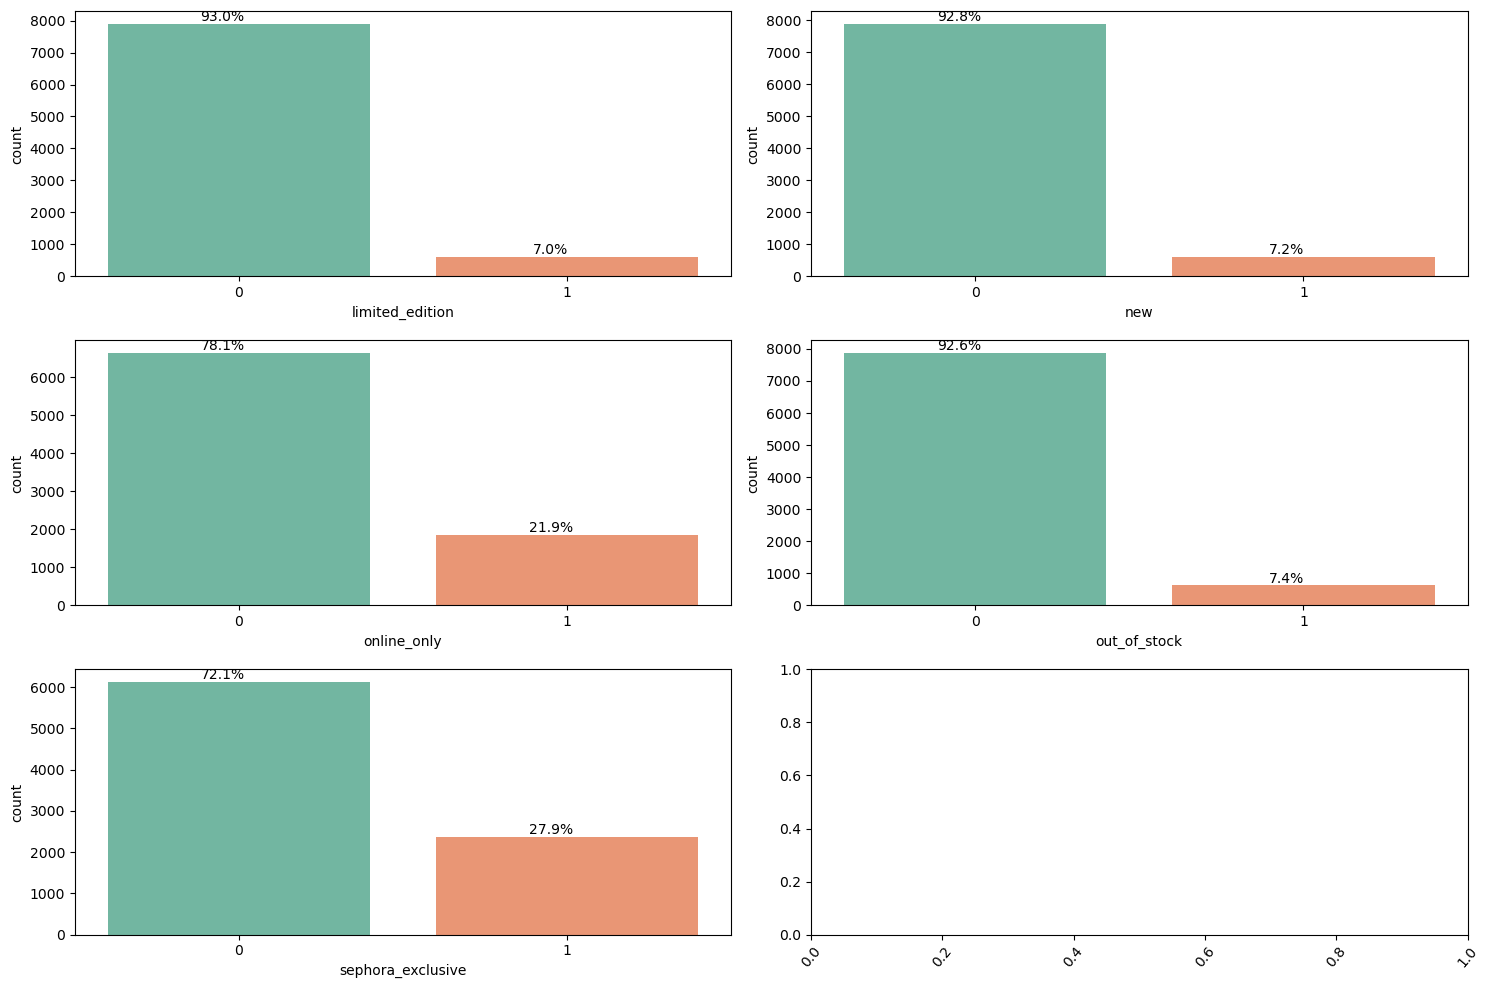

In [9]:
figure, axes = plt.subplots(3, 2, figsize=(15, 10))
dfff = ['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']

for i, genre in enumerate(dfff):
    row = i // 2
    col = i % 2
    ax = sns.countplot(
        ax=axes[row, col], 
        x=df_product[genre], 
        data=df_product, 
        palette='Set2', 
        hue=df_product[genre],  
        legend=False  
    )
    total = len(df_product[genre])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xticks(rotation=50)
plt.tight_layout()
plt.show()


These columns show a significant imbalance, with most products being non-limited edition (93%), not new (92.8%), and in stock (92.6%). A smaller proportion of products are online-only (21.9%) and exclusive to Sephora (27.9%).

In [18]:
def plot_count_by_col_bar(df, columns, cat):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col, hue=cat)
        plt.xticks(rotation=45)
        plt.title(f'Count of {col} by {cat}')
        plt.legend(title=cat)
        plt.show()

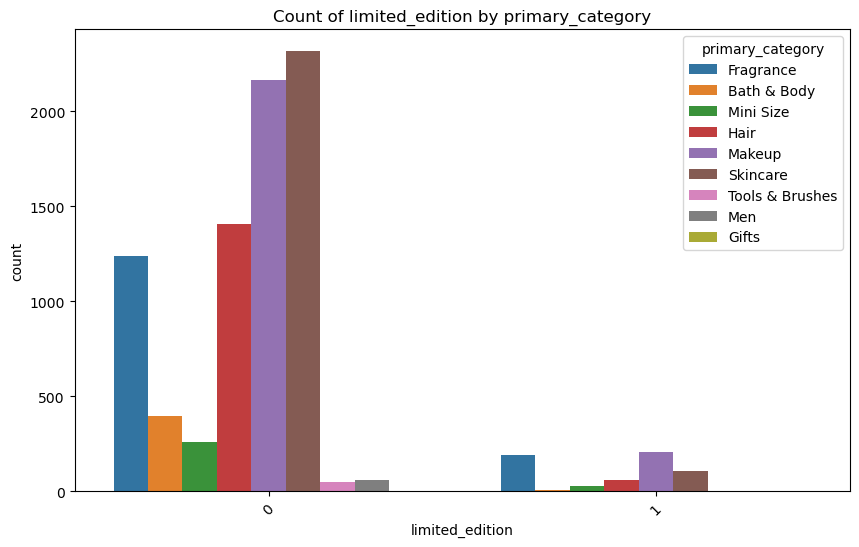

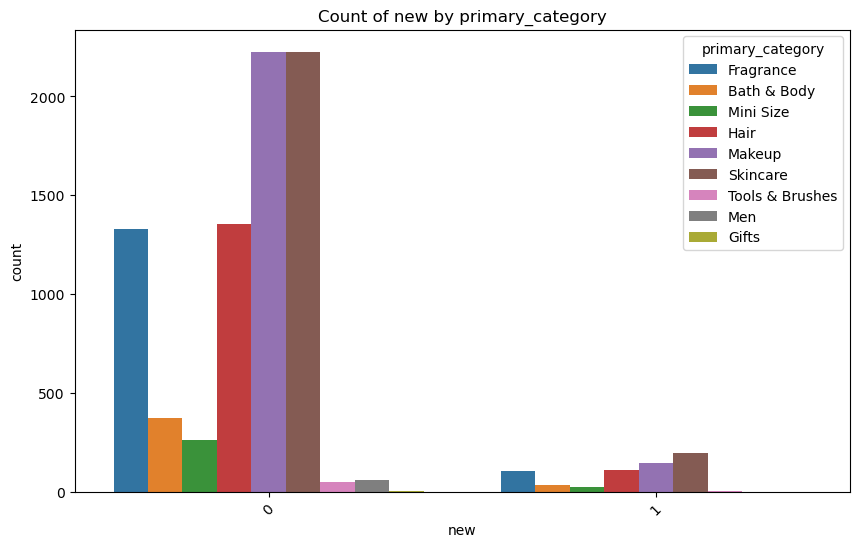

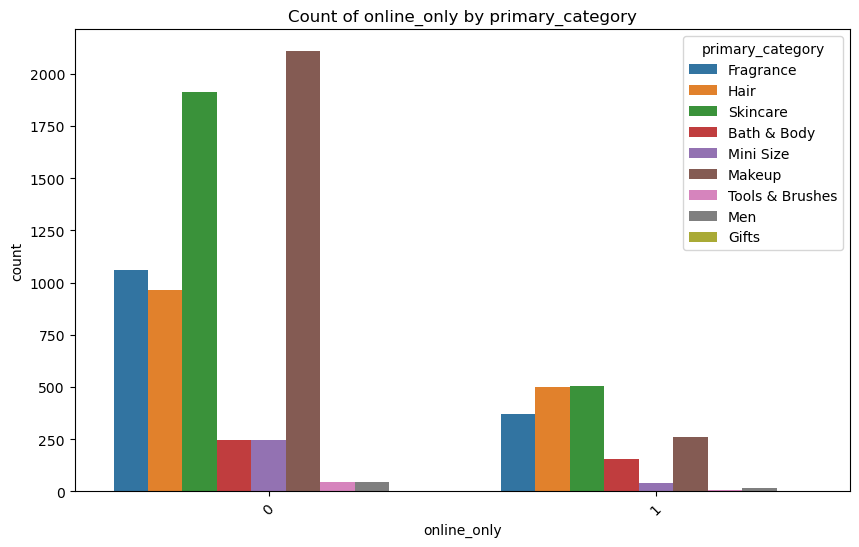

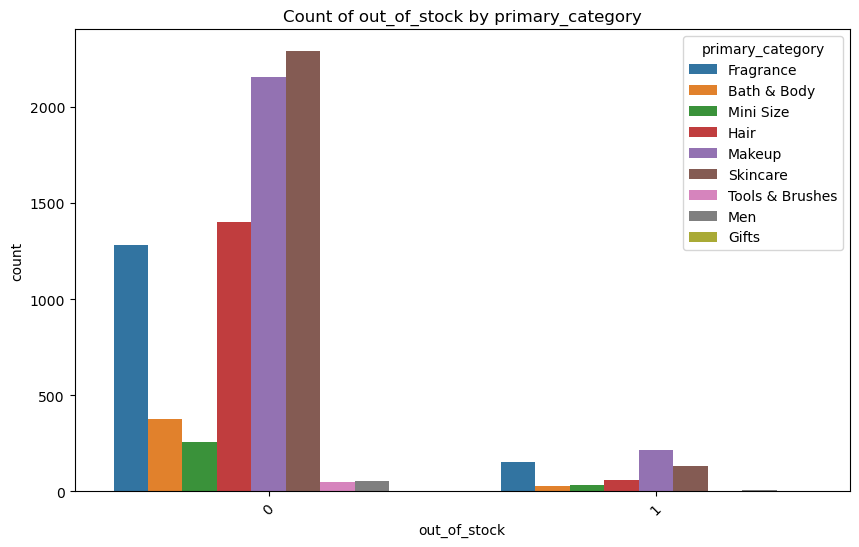

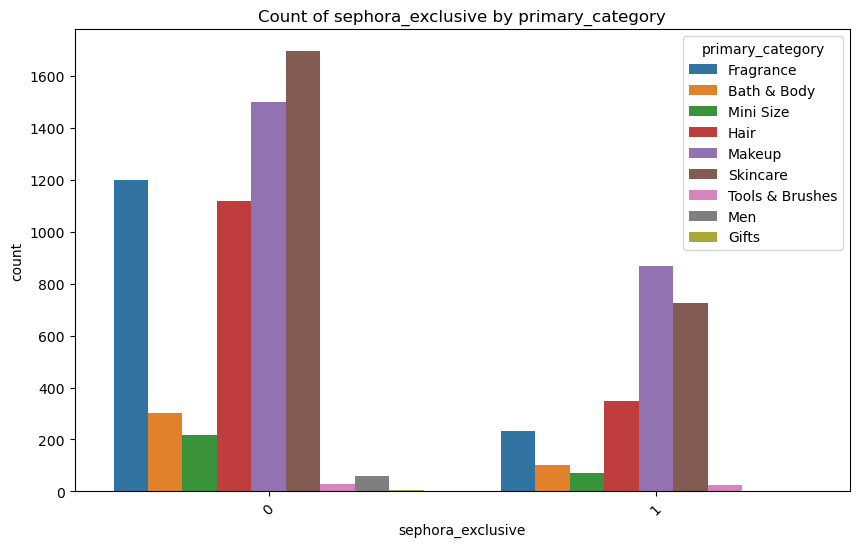

In [ ]:
plot_count_by_col_bar(df_product, ['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive'], cat='primary_category')

Make-up and Skincare appear to dominate in these features.

### Numerical data


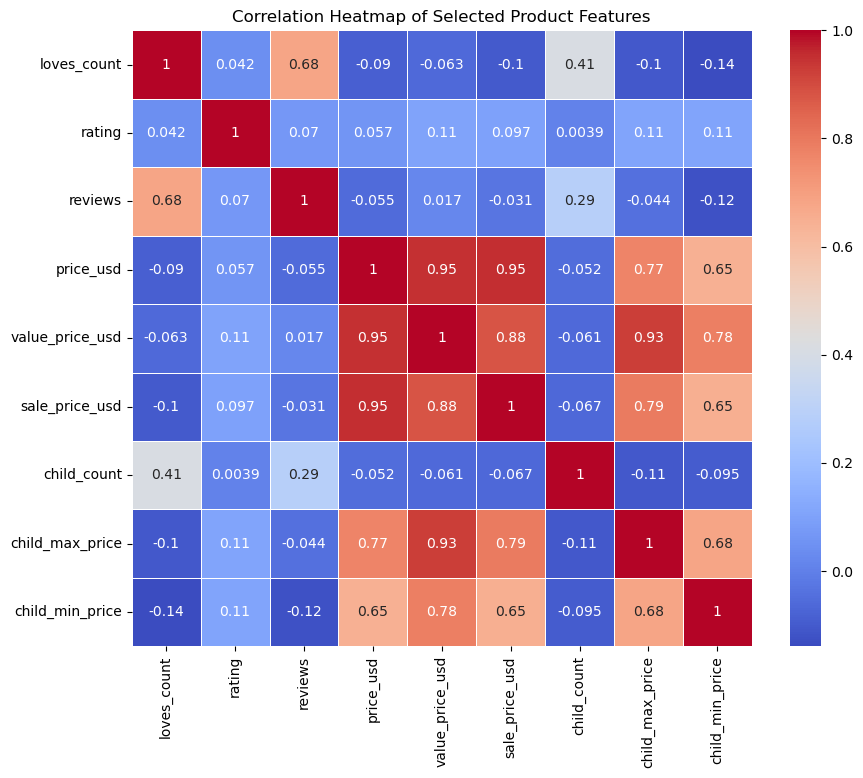

In [ ]:
selected_columns = ['loves_count', 'rating', 'reviews', 'price_usd', 
                    'value_price_usd', 'sale_price_usd', 'child_count', 
                    'child_max_price', 'child_min_price']

df_selected = df_product[selected_columns]
correlation_matrix = df_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Product Features")
plt.show()

As we can see from the heatmap above, the features 'loves_count', and 'reviews' are highly correlated with each other. This suggests that they may be measuring similar aspects of product popularity or customer satisfaction. 

The 'price_usd', 'value_price_usd' and 'sale_price_usd' features are also highly correlated, which is expected as they both relate to the pricing of the products. So we consider to drop one of these columns and only use columns 'price_usd'. 

These price columns also have a quite high correlation to 'child_max_price' and 'child_min_price' also they have a significant correlation between themselves too.


### Missing values

In [10]:
df_product.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

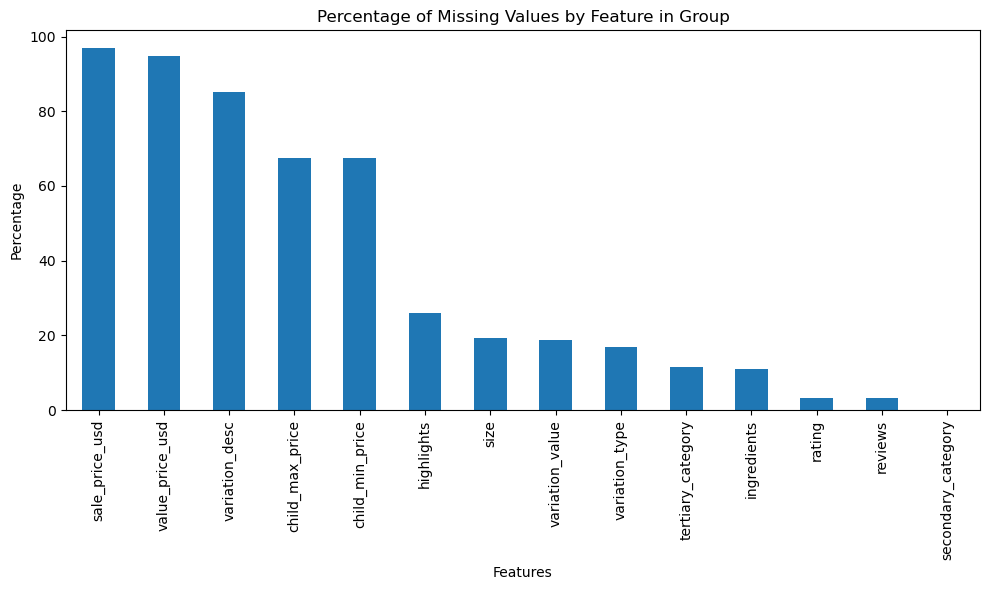

,Feature,Missing Count,Missing Percentage
sale_price_usd,sale_price_usd,8224,96.821286
value_price_usd,value_price_usd,8043,94.690370
variation_desc,variation_desc,7244,85.283730
child_max_price,child_max_price,5740,67.577113
child_min_price,child_min_price,5740,67.577113
highlights,highlights,2207,25.983047
size,size,1631,19.201789
variation_value,variation_value,1598,18.813280
variation_type,variation_type,1444,17.000235
tertiary_category,tertiary_category,990,11.655286


In [11]:
quantify_missing_data_by_group(df_product, df_product.columns.tolist())

Since 'sale_price_usd', 'value_price_usd', 'variation_desc', 'child_max_price', and 'child_min_price' has more than 50% of missing values and they also have a high correlation with other columns so we will drop these in the preprocessing step.

In [29]:
import warnings

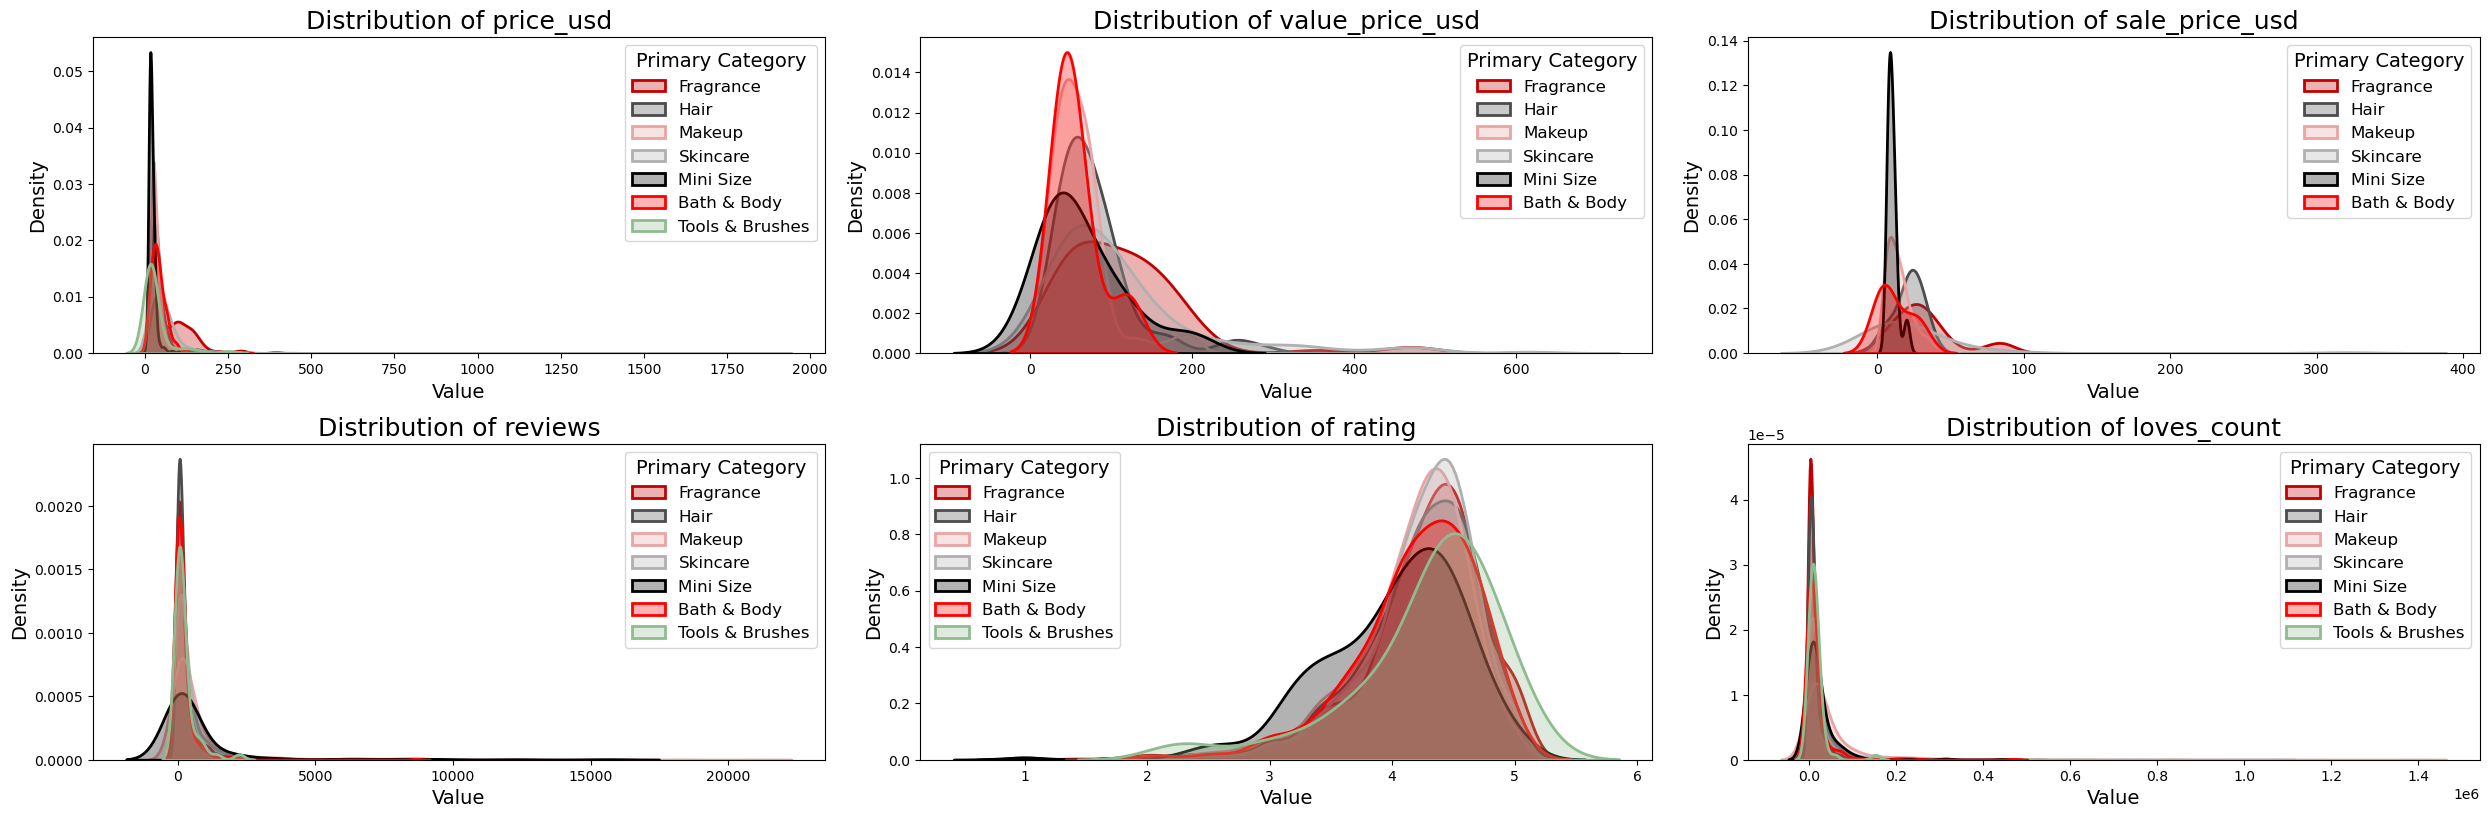

In [30]:
warnings.filterwarnings("ignore")
# Define the list of columns to analyze
ff = ['price_usd', 'value_price_usd', 'sale_price_usd', 'reviews', 'rating', 'loves_count']

# Existing code
fig = plt.figure(figsize=(25, 20))
colors = {
    'Fragrance': '#C20000',
    'Hair': '#4C4C4C',
    'Makeup': '#EBA3A3',
    'Skincare': '#B0B0B0',
    'Mini Size': 'black',
    'Bath & Body': 'red',
    'Tools & Brushes': 'darkseagreen'
}
for i, col in enumerate(ff):
    ax = fig.add_subplot(5, 3, i + 1)
    for category, color in colors.items():
        category_data = df_product[df_product['primary_category'] == category][col]
        if not category_data.empty:
            sns.kdeplot(
                category_data,
                color=color,
                label=category,
                linewidth=2,
                fill=True,
                alpha=0.3
            )
    ax.set_title(f'Distribution of {col}', fontsize=18)
    ax.set_xlabel("Value", fontsize=14)
    ax.set_ylabel("Density", fontsize=14)
    ax.legend(title='Primary Category', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

The price_usd, value_price_usd, and sale_price_usd distributions show a strong concentration of products at lower prices, with Fragrance and Bath & Body products generally having higher price values compared to other categories.

Most products are rated between 3 and 5, with Fragrance and Hair categories skewing toward higher ratings.

Distribution of reviews and loves_count is heavily right-skewed, indicating that most products have a relatively low number of "reviews" and "loves" but there are some outliers.

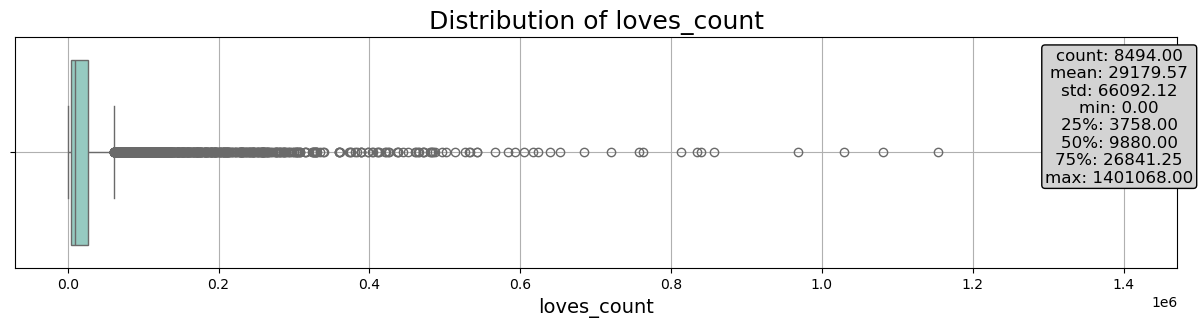

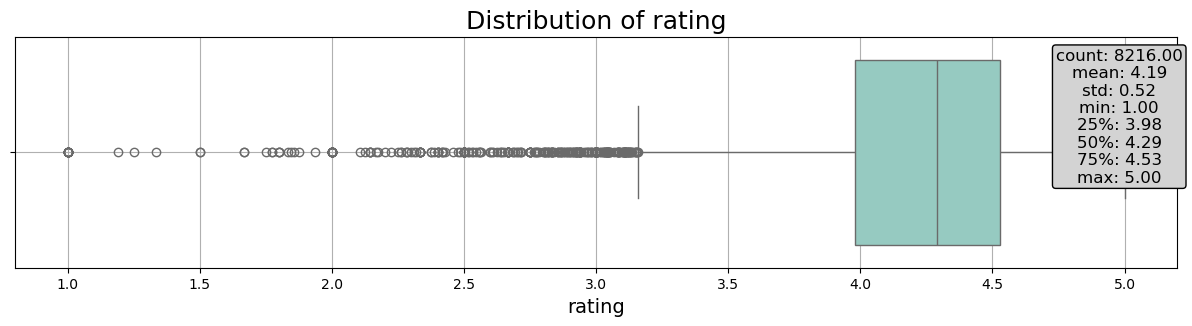

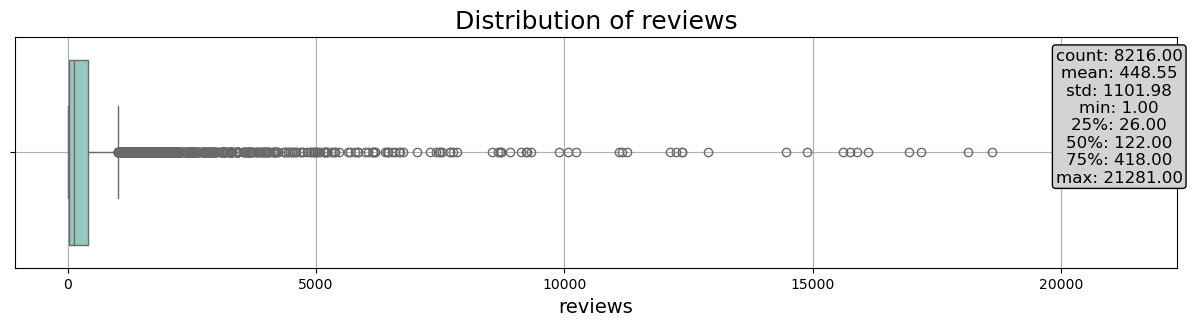

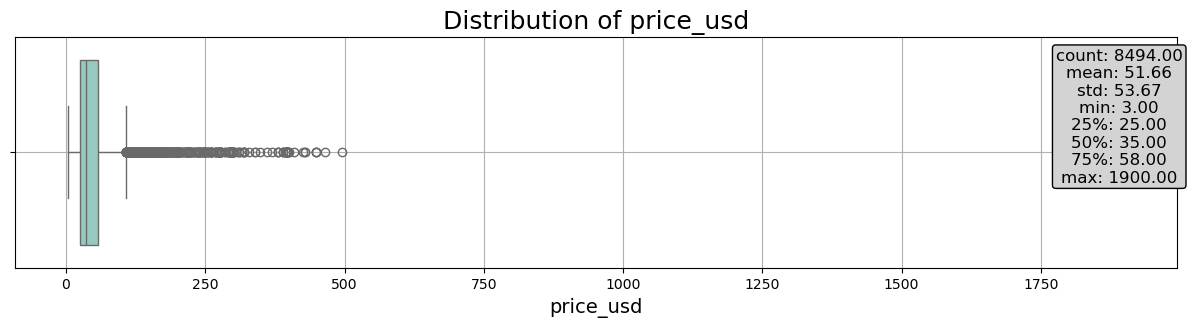

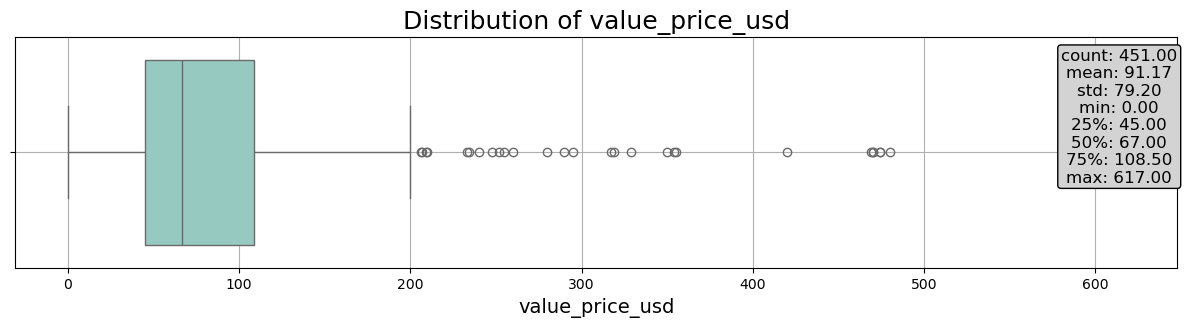

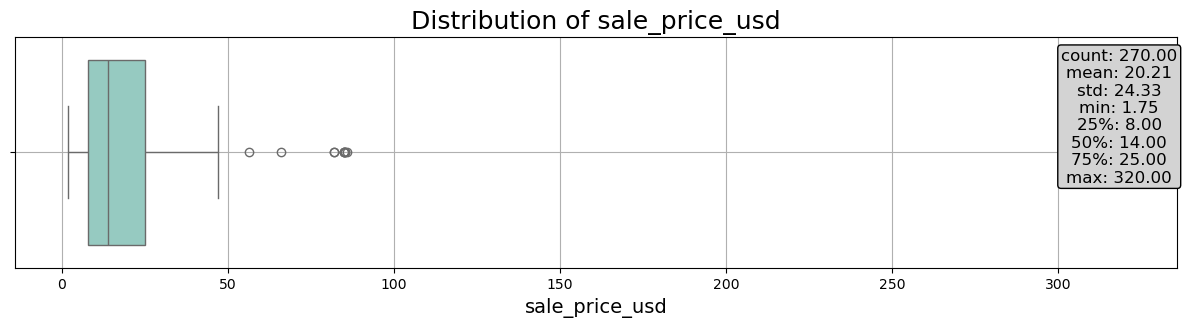

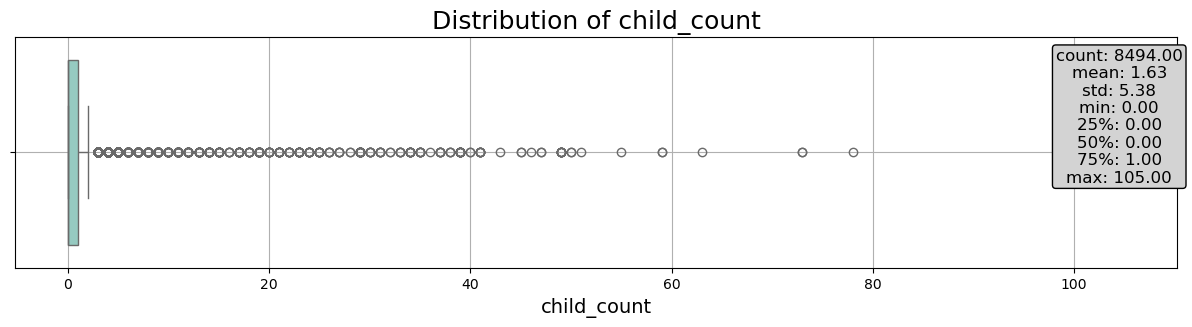

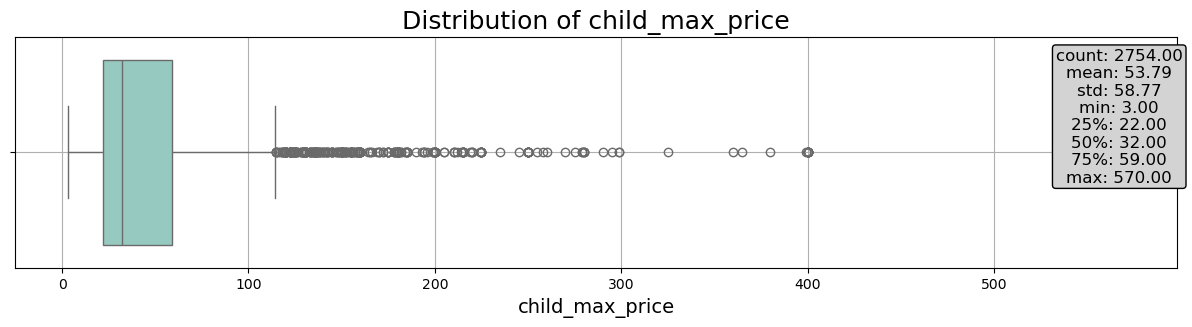

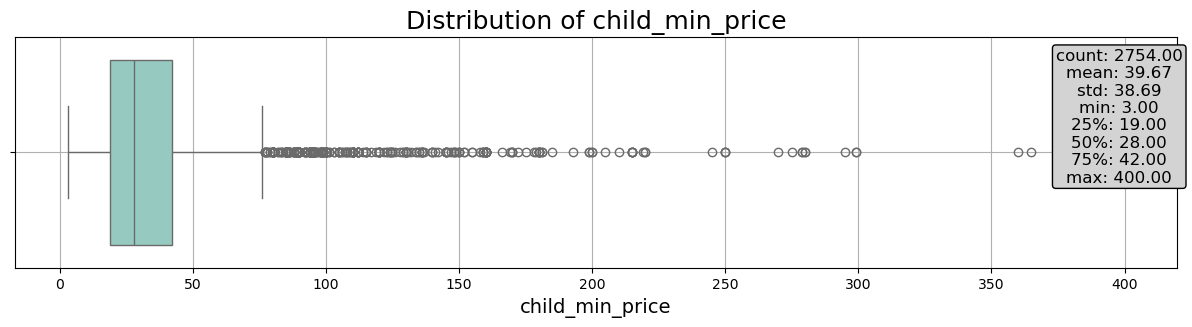

In [31]:
for column in selected_columns:
    plt.figure(figsize=(15, 3)) 
    sns.boxplot(x=df_product[column], palette='Set3')
    plt.title(f'Distribution of {column}', fontsize=18)
    plt.xlabel(column, fontsize=14)
    stats = df_product[column].describe()
    stats_text = "\n".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', 
             horizontalalignment='center', bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='lightgrey'))
    plt.grid(True) 
    plt.show()

Some columns with outliers seem to be their own pattern since the customer will have their own rating and review range so we keep the outliers.

And we check why there is some columns has the minimum values being 0

In [ ]:
#print columns where loves_count ==0
df_product[df_product['loves_count'] == 0]

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
60,P473154,Mini Baomint Moisturizing Curl Defining Gel,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 94 g,Size,3.3 oz/ 94 g,NaN,"['Water (Aqua), Glycerin, Prunus Amygdalus Dul...",14.0,NaN,NaN,0,0,0,0,1,"['allure 2020 Best of Beauty Award Winner', 'C...",Hair,Mini Size,NaN,0,NaN,NaN
61,P473153,Mini Baomint Moisturizing Curl Defining Cream,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 94 g,Size,3.3 oz/ 94 g,NaN,"['Water (Aqua), Behentrimonium Methosulfate, C...",14.0,NaN,NaN,0,0,1,0,1,"['Clean at Sephora', 'Good for: Volume', 'All ...",Hair,Mini Size,NaN,0,NaN,NaN
62,P473152,Mini Baomint Leave-In Conditioning Styler,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 98 mL,Size,3.3 oz/ 98 mL,NaN,"['Water (Aqua), Behentrimonium Methosulfate, C...",13.0,NaN,NaN,0,0,1,0,1,"['Clean at Sephora', 'All Hair Types', 'Curl-E...",Hair,Mini Size,NaN,0,NaN,NaN
63,P473155,Mini Baomint Moisturizing Shampoo,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 98 mL,Size,3.3 oz/ 98 mL,NaN,"['Water (Aqua), Aloe Barbadensis Leaf Juice, C...",12.0,NaN,NaN,0,0,1,0,1,"['Unisex/ Genderless Scent', 'Clean at Sephora...",Hair,Mini Size,NaN,0,NaN,NaN
64,P473156,Mini Baomint Protect + Shine Oil Blend,6321,adwoa beauty,0,NaN,NaN,3.3 oz/ 98 mL,Size,3.3 oz/ 98 mL,NaN,"['Glycine Soja (Soybean) Oil, Vitis Vinifera (...",11.0,NaN,NaN,0,0,1,0,1,"['Clean at Sephora', 'All Hair Types', 'Curly ...",Hair,Mini Size,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,P463103,Rose Gold Slant Tweezer,5651,TWEEZERMAN,0,NaN,NaN,8.97 oz,Color,Rose Gold,NaN,NaN,24.0,NaN,NaN,0,0,0,0,1,NaN,Tools & Brushes,Beauty Tools,Tweezers & Eyebrow Tools,0,NaN,NaN
8034,P446821,Heavy Metal Glitter Eyeliner - Sparkle Out Lou...,3806,Urban Decay,0,NaN,NaN,0.25 oz/ 7.5 mL,Color,Disco Daydream,silver holographic,"['Water, Polyethylene Terephthalate, Calcium S...",25.0,NaN,NaN,0,0,0,0,0,NaN,Makeup,Eye,Eyeliner,4,25.0,25.0
8205,P502029,Mini Good Fortune and Flowerbomb Perfume Set,5979,Viktor&Rolf,0,NaN,NaN,NaN,NaN,NaN,NaN,"['Flowerbomb Eau de Parfum:', 'Alcohol, Parfum...",29.0,50.0,NaN,0,0,0,0,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8331,P479727,Mini Panjore Lychee Glass Jar Candle,6245,VOLUSPA,0,NaN,NaN,5.5 oz/ 156 g,Size + Concentration + Formulation,5.5 oz/ 156 g 1-wick Candle,NaN,['All Voluspa candles are vegan and contain a ...,20.0,NaN,NaN,0,0,0,0,0,['Fresh Scent'],Fragrance,Candles & Home Scents,Candles,0,NaN,NaN


'loves_count' being 0 since there is no one marked this product as a favorite

In [27]:
#print columns where value_price_usd ==0
df_product[df_product['value_price_usd'] == 0].head(10)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
569,P500840,Gimme Brow+ Volumizing Fiber Eyebrow Pencil,5333,Benefit Cosmetics,12357,4.3776,1205.0,0.042 oz. / 1.19 g,Color,1,cool light blonde,['Dimethicone/Divinyldimethicone/Silsesquioxan...,25.0,0.0,NaN,0,0,0,0,0,"['allure 2022 Best of Beauty Award Winner', 'N...",Makeup,Eye,Eyebrow,14,25.0,15.0
588,P501426,Mini Gimme Brow + Volumizing Fiber Eyebrow Pencil,5333,Benefit Cosmetics,3656,4.4000,95.0,0.02oz / 0.6g,Color,3,warm light brown,['Dimethicone/Divinyldimethicone/Silsesquioxan...,15.0,0.0,NaN,0,0,0,0,0,"['allure 2022 Best of Beauty Award Winner', 'N...",Mini Size,Makeup,NaN,2,15.0,15.0


'value_price_usd' is the potential cost savings of the product, which is the difference between the regular price and the sale price. It means there is no cost saving for that product since the 'sale_price_usd' is missing. 

### Categorical data

In [27]:
cat_df = df_product.select_dtypes(include="object")
cat_df.head()

,product_id,product_name,brand_name,size,variation_type,variation_value,variation_desc,ingredients,highlights,primary_category,secondary_category,tertiary_category
0,P473671,Fragrance Discovery Set,19-69,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...","['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets
1,P473668,La Habana Eau de Parfum,19-69,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume
2,P473662,Rainbow Bar Eau de Parfum,19-69,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume
3,P473660,Kasbah Eau de Parfum,19-69,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume
4,P473658,Purple Haze Eau de Parfum,19-69,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume


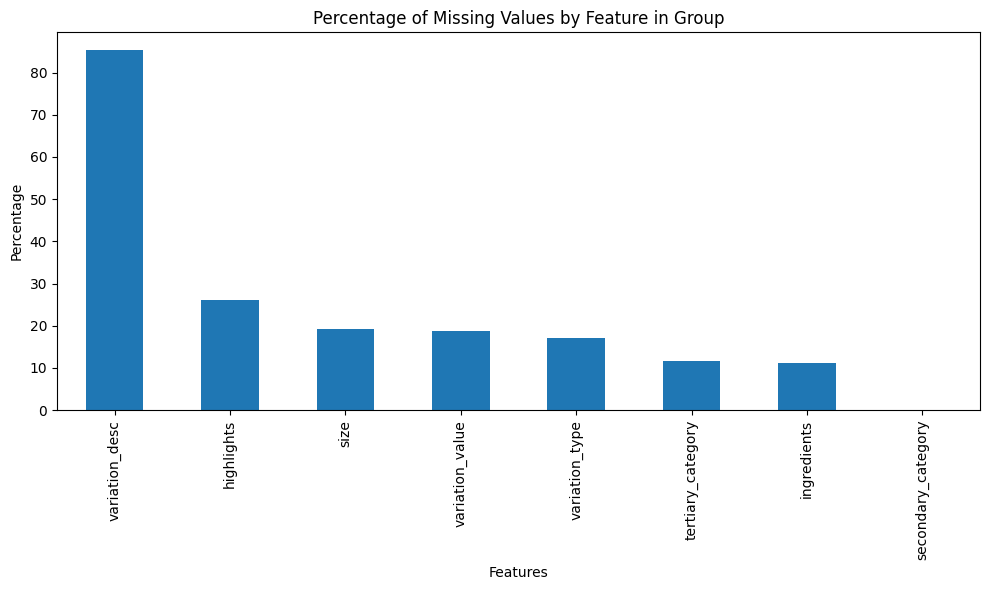

,Feature,Missing Count,Missing Percentage
variation_desc,variation_desc,7244,85.283730
highlights,highlights,2207,25.983047
size,size,1631,19.201789
variation_value,variation_value,1598,18.813280
variation_type,variation_type,1444,17.000235
tertiary_category,tertiary_category,990,11.655286
ingredients,ingredients,945,11.125500
secondary_category,secondary_category,8,0.094184
product_id,product_id,0,0.000000
product_name,product_name,0,0.000000


In [28]:
quantify_missing_data_by_group(cat_df, cat_df.columns.tolist())

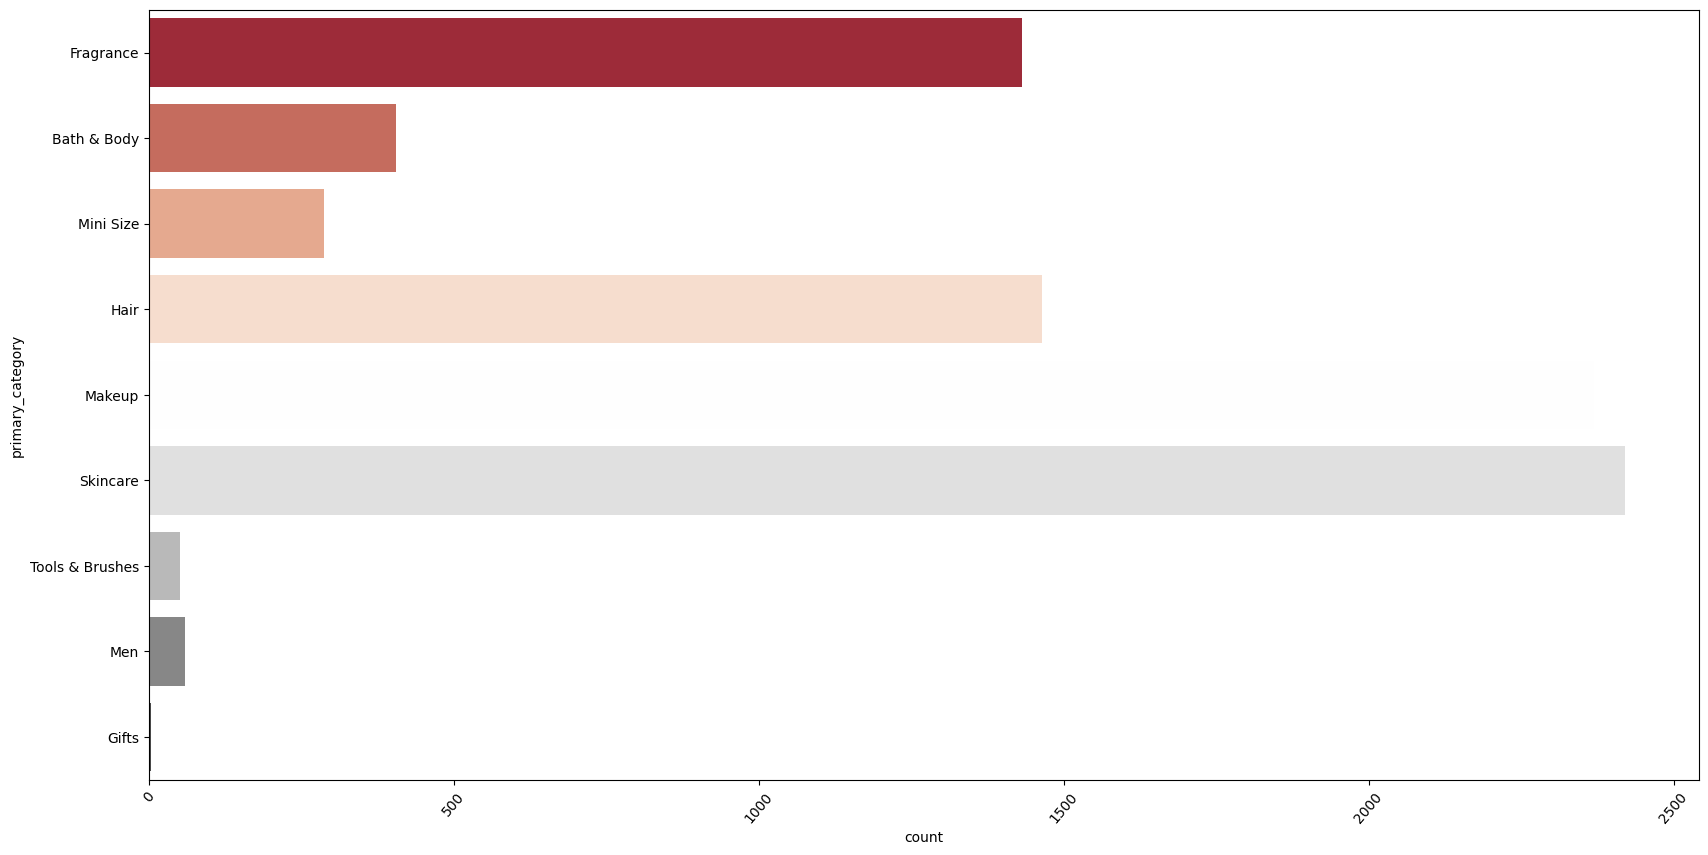

In [29]:
ww = df_product["primary_category"]
plt.figure(figsize=(20, 10))
plt.xticks(rotation=50)
sns.countplot(y=ww,palette='RdGy')
plt.show()

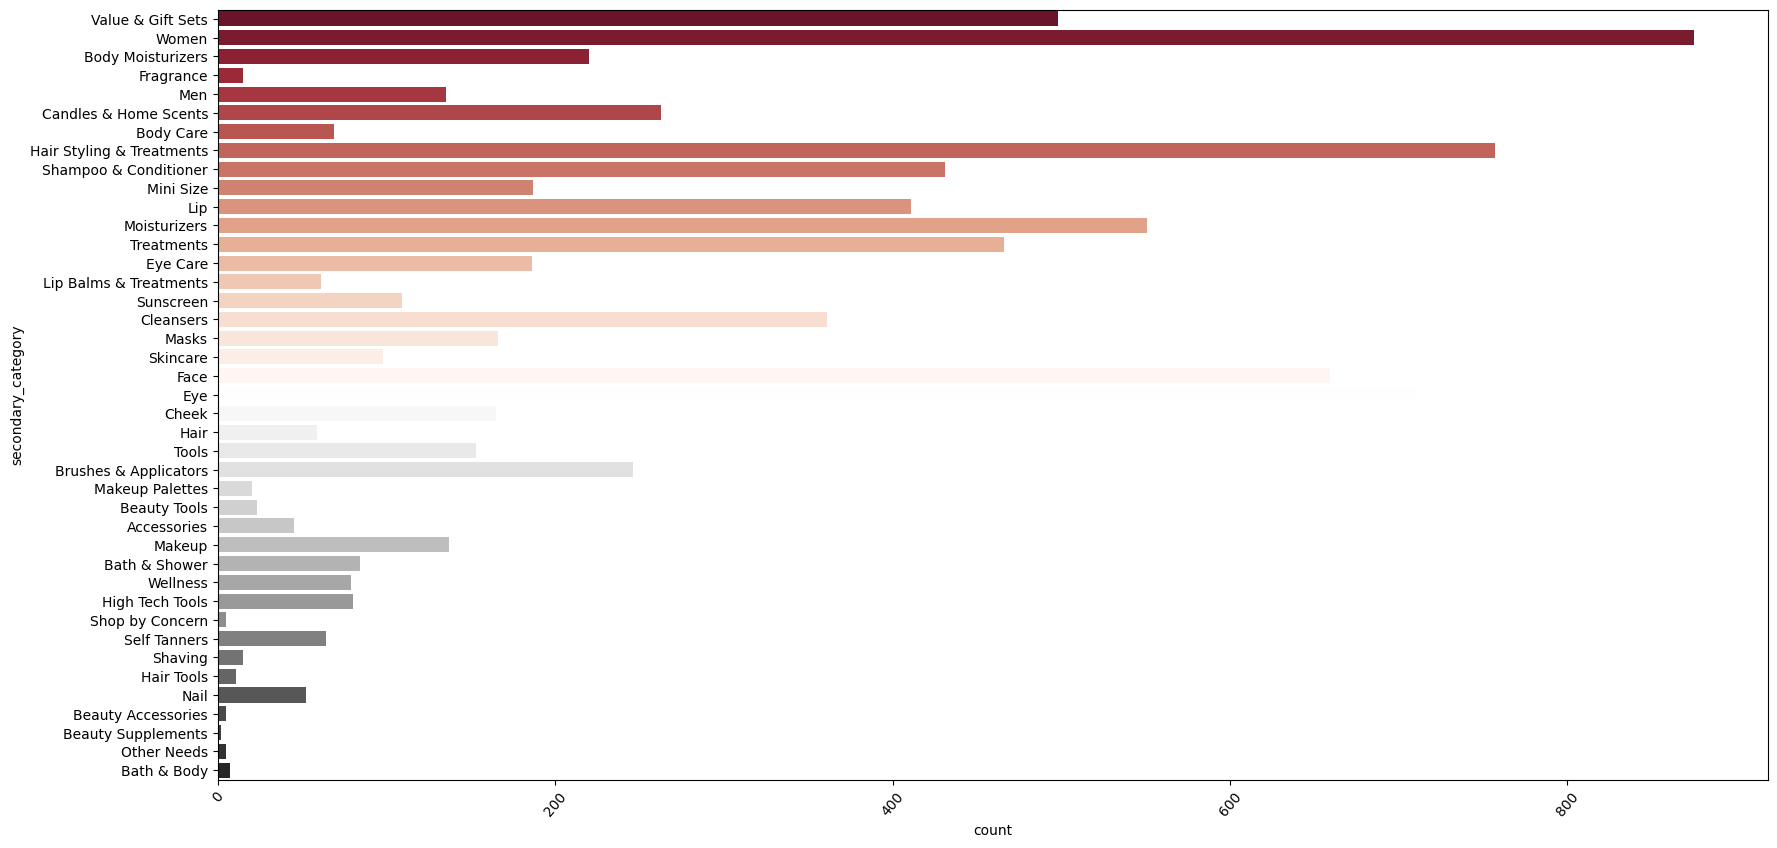

In [30]:
ww = df_product["secondary_category"]
plt.figure(figsize=(20, 10))
plt.xticks(rotation=50)
sns.countplot(y=ww,palette='RdGy')
plt.show()

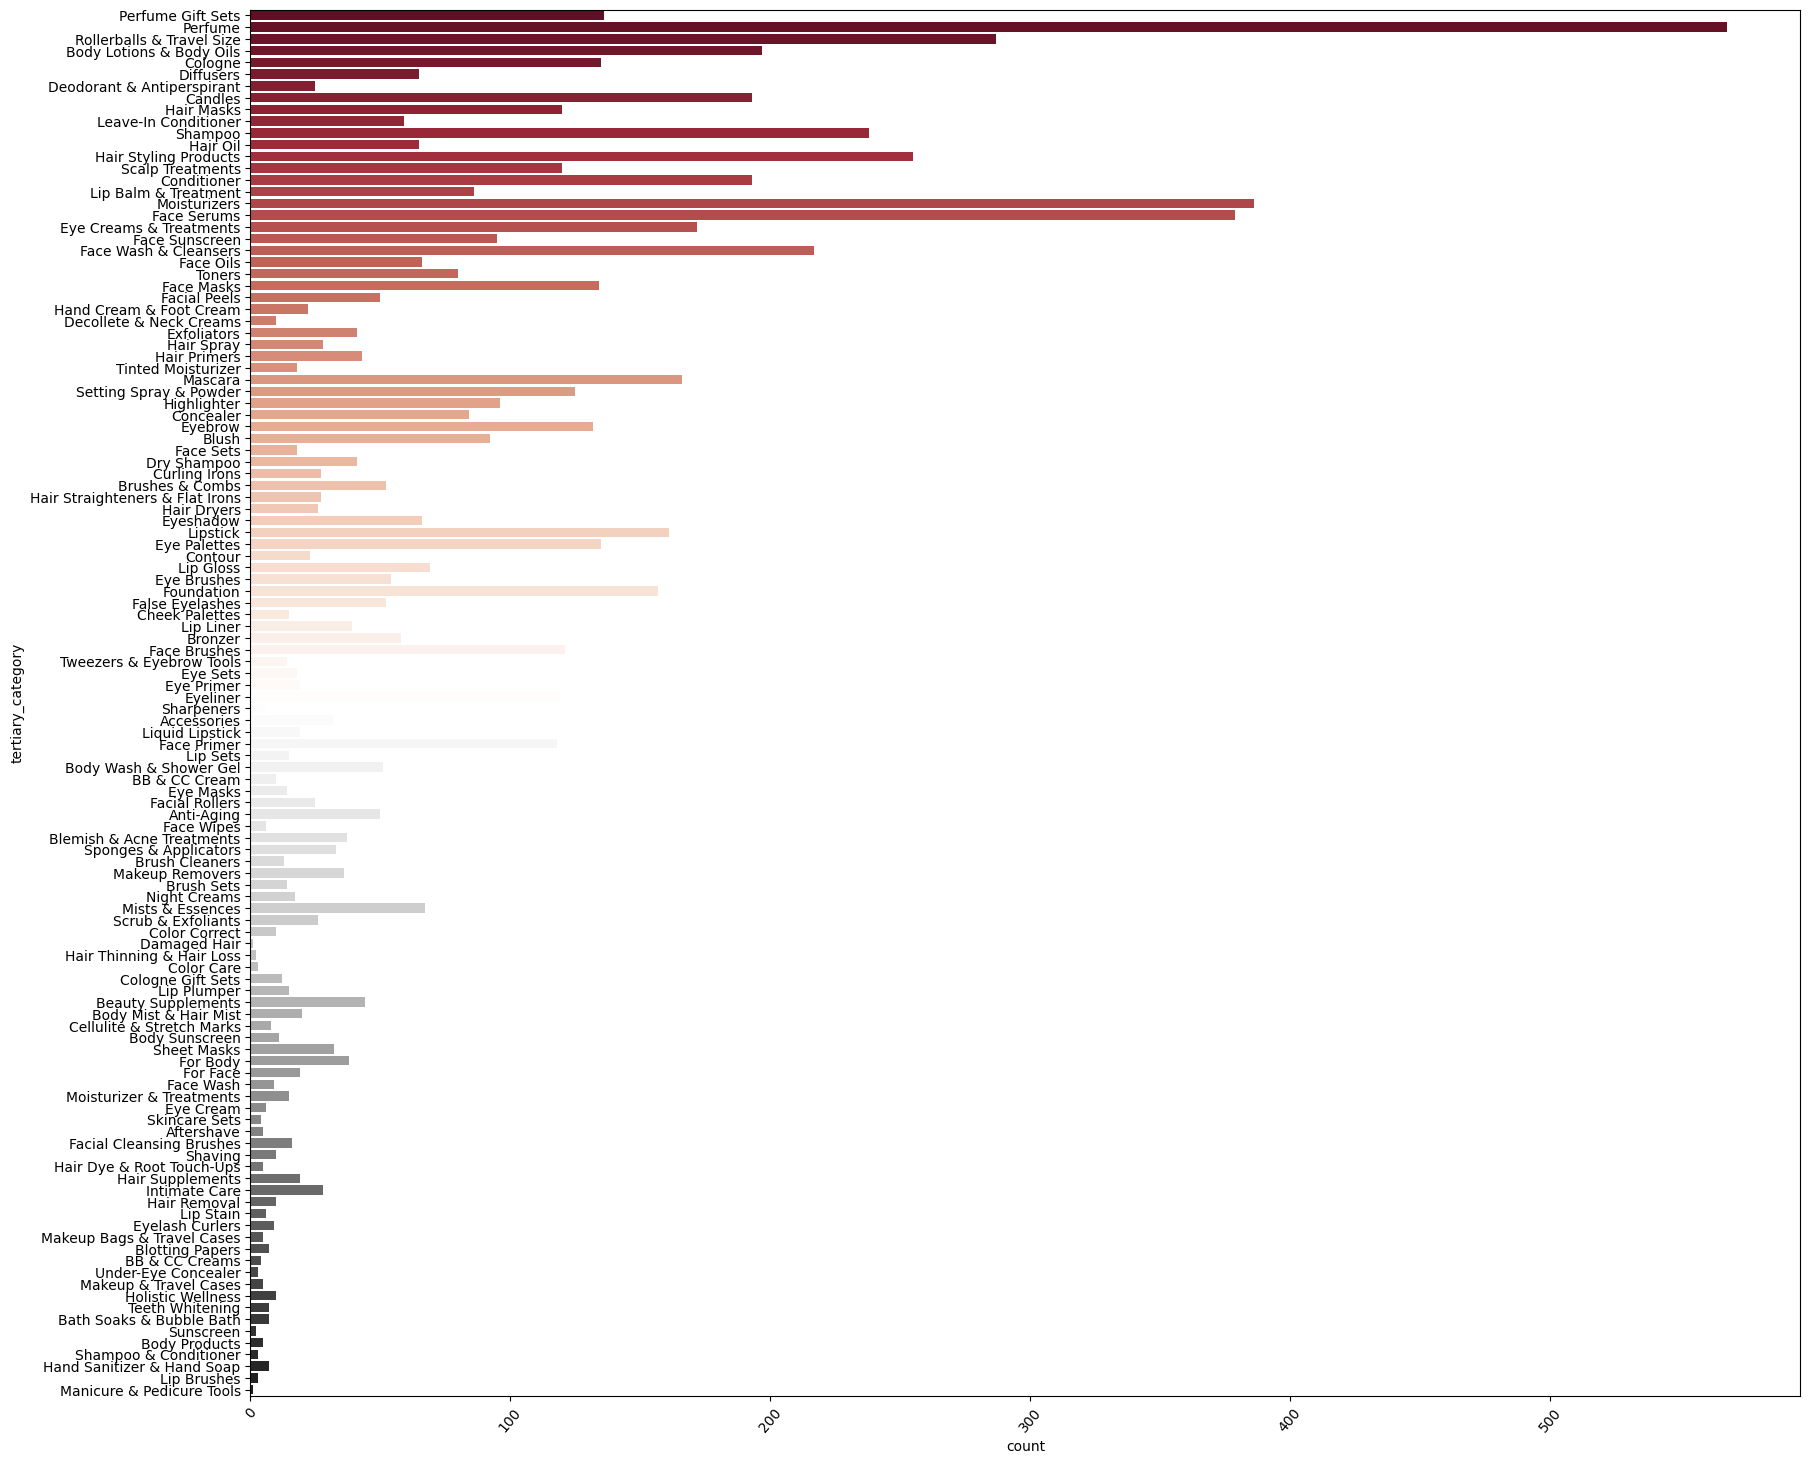

In [31]:
ww = df_product["tertiary_category"]
plt.figure(figsize=(20, 18))
plt.xticks(rotation=50)
sns.countplot(y=ww,palette='RdGy')
plt.show()

In [32]:
df_product['size'].value_counts()

size
1.7 oz/ 50 mL          500
1 oz/ 30 mL            366
3.4 oz/ 100 mL         211
0.5 oz/ 15 mL          171
1.7 oz / 50 mL         124
                      ... 
2 x 0.28 oz/ 8.5 ml      1
0.2 oz /5.8 g            1
0.14 oz/ 4.2mL           1
0.44 oz/ 12.5g           1
.11 oz / 3.2 mL          1
Name: count, Length: 2055, dtype: int64

In [33]:
df_product['variation_value'].value_counts()

variation_value
1.7 oz/ 50 mL                       374
1 oz/ 30 mL                         302
0.5 oz/ 15 mL                       147
3.4 oz/ 100 mL                      128
1.7 oz / 50 mL                       96
                                   ... 
Obsidian                              1
Diffused Bronze Light                 1
Mini Size - 0.31 oz/ 8.9 mL           1
Champagne Flash                       1
2 oz / 60 mL eau de parfum spray      1
Name: count, Length: 2729, dtype: int64

In [35]:
df_product['variation_type'].value_counts()

variation_type
Size                                  4043
Color                                 1700
Size + Concentration + Formulation    1173
Type                                    88
Scent                                   30
Size + Concentration                    11
Formulation                              5
Name: count, dtype: int64

Column 'variation_type' has 6 type of Size, Color, Scent, Type, Size + Concentration + Formulation, Size + Concentration and 'variation_value' presenting the value of the 'variation_type' therefore we use feature engineering to preprocessing these columns

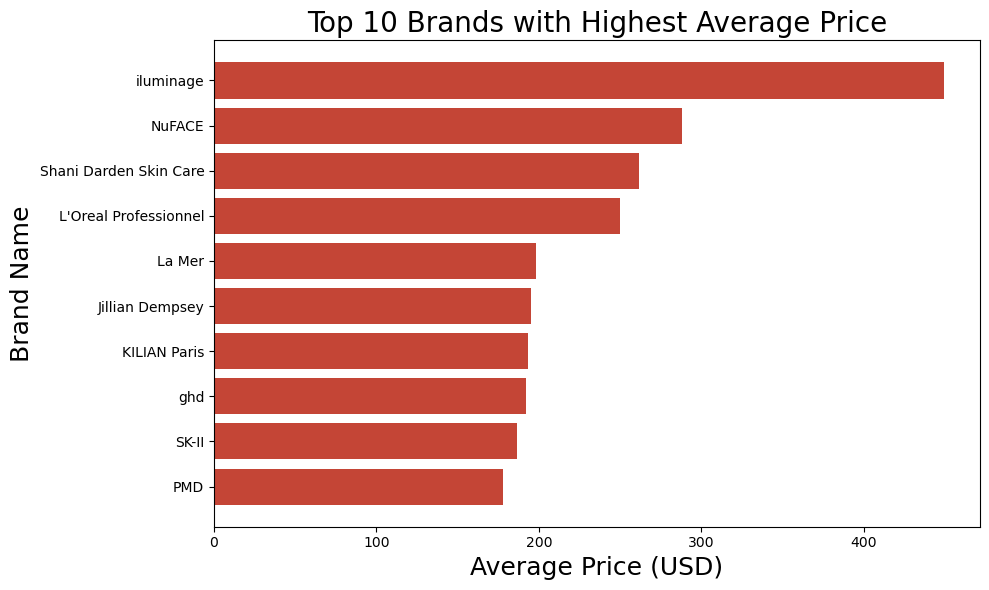

In [35]:
# Top 10 brands with the highest price
brands = df_product[['brand_name', 'price_usd']].groupby('brand_name').mean().sort_values('price_usd', ascending=False).head(10)
plt.figure(figsize=(10, 6), dpi=100)
plt.barh(brands.index, brands['price_usd'], color='#C44536')
plt.title('Top 10 Brands with Highest Average Price', fontsize=20)
plt.xlabel('Average Price (USD)', fontsize=18)
plt.ylabel('Brand Name', fontsize=18)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

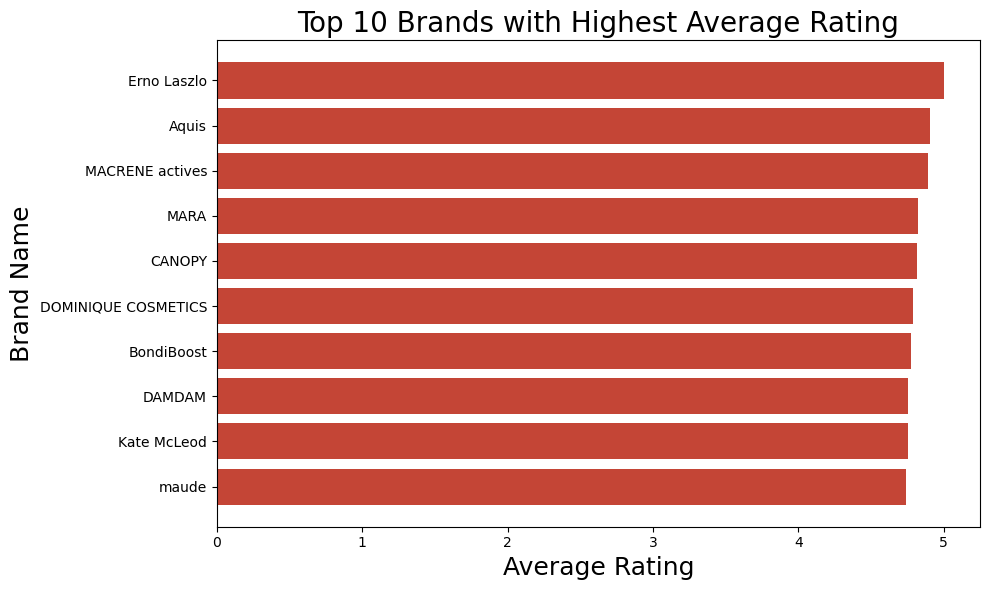

In [36]:
#Top 10 brands with the highest rating
brands = df_product[['brand_name', 'rating']].groupby('brand_name').mean().sort_values('rating', ascending=False).head(10)
plt.figure(figsize=(10, 6), dpi=100)
plt.barh(brands.index, brands['rating'], color='#C44536')
plt.title('Top 10 Brands with Highest Average Rating', fontsize=20)
plt.xlabel('Average Rating', fontsize=18)
plt.ylabel('Brand Name', fontsize=18)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

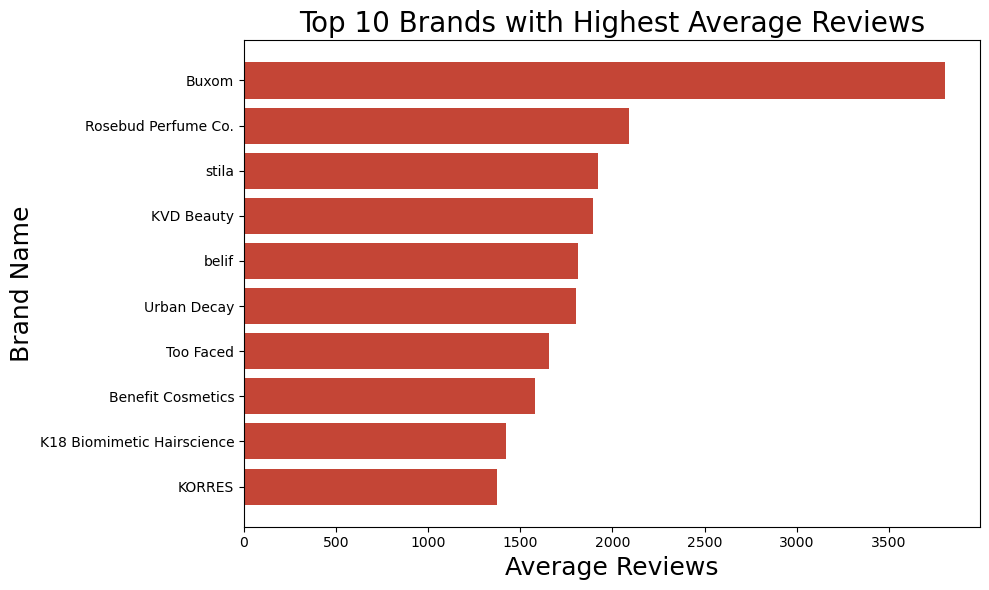

In [37]:
#Top 10 brands with the highest reviews
brands = df_product[['brand_name', 'reviews']].groupby('brand_name').mean().sort_values('reviews', ascending=False).head(10)
plt.figure(figsize=(10, 6), dpi=100)
plt.barh(brands.index, brands['reviews'], color='#C44536')
plt.title('Top 10 Brands with Highest Average Reviews', fontsize=20)
plt.xlabel('Average Reviews', fontsize=18)
plt.ylabel('Brand Name', fontsize=18)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Review dataset

In [38]:
df1 = pd.read_csv('Data/reviews_0-250.csv')
df2 = pd.read_csv('Data/reviews_250-500.csv')
df3 = pd.read_csv('Data/reviews_500-750.csv')
df4 = pd.read_csv('Data/reviews_750-1250.csv')
df5 = pd.read_csv('Data/reviews_1250-end.csv')

df_review = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df_review.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [43]:
df_review.shape

(1094411, 19)

In [44]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

In [39]:
df_review.drop(columns=['Unnamed: 0'], inplace=True, axis=1)
df_review.isnull().sum()

author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64

In [40]:
df_review.duplicated().sum()

224

In [47]:
df_dup = df_review[df_review.duplicated()]
df_dup

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
5339,1150759844,5,1.0,NaN,0,0,0,2020-06-26,I bought this after I tried a sample. It’s ver...,NaN,deep,brown,combination,red,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
5477,1604550515,5,1.0,NaN,0,0,0,2020-06-15,My lips are smooth & full! This feels wonderfu...,Full Baby Lips,mediumTan,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
7242,2003943527,5,1.0,NaN,0,0,0,2020-02-20,I love this lip mask! i use it twice a week an...,The Softest lips!!,olive,brown,oily,brunette,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
7244,1557672780,5,1.0,NaN,0,0,0,2020-02-20,THE BEST!! Makes my lips so smooth and soft. I...,More than a sleeping mask,mediumTan,brown,combination,auburn,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
7911,12801717308,5,1.0,NaN,0,0,0,2019-12-19,This lip mask is incredible! Especially in the...,Beauty Must Have!,light,blue,combination,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945008,909571449,5,1.0,1.0,1,0,1,2021-01-06,This moisturizer is hydrating and also gives m...,Hydrating and brightening,light,blue,dry,brown,P467750,Resveratrol Lift Retinol Alternative Firming C...,Caudalie,69.0
964820,11328153308,5,1.0,1.0,2,0,2,2022-09-23,I received this toner as part of a free sample...,Love it!,fairLight,hazel,dry,brown,P500894,Fat Water Hydrating Milky Toner Essence with H...,Fenty Skin,34.0
999758,5447763758,5,1.0,NaN,0,0,0,2022-06-05,I really enjoy this product! It has a thinner...,NaN,tan,brown,combination,brown,P500039,The Neck Serum - With 5 Peptides | 9% Peptide ...,Nécessaire,60.0
1008268,10379330825,5,1.0,NaN,0,0,0,2021-04-06,I appreciate that this toner is unscented beca...,NaN,fair,brown,combination,black,P469818,Cactus Water Cleansing Lactic Acid Toner,Freck Beauty,32.0


There are 224 duplicated rows (reviews column are not duplicated) in the dataset and we can see plenty of NAN datas.

10 columns are of type Object, 3 columns are of type float64, and the rest are of type int64.

## Numerical columns

In [41]:
numeric_cols = df_review.select_dtypes(include = ['number']).columns
print(numeric_cols)

Index(['rating', 'is_recommended', 'helpfulness', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd'],
      dtype='object')


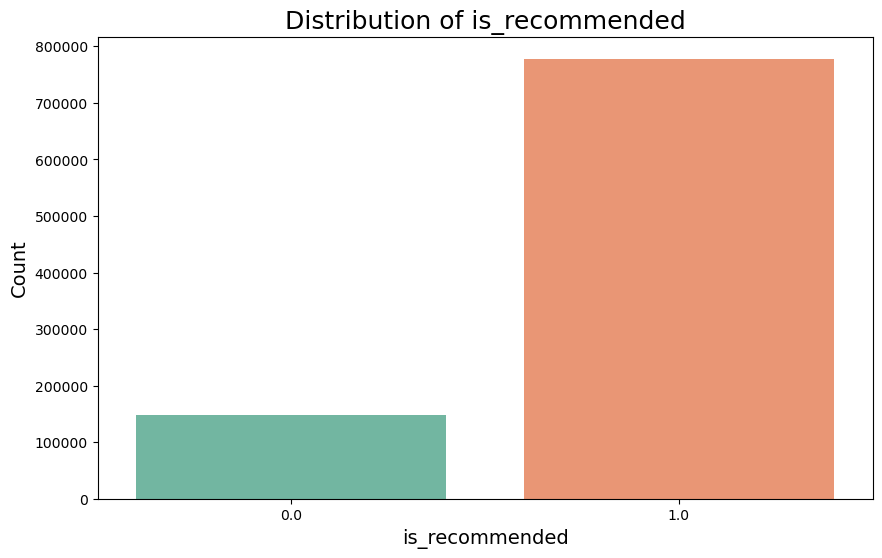

In [47]:
# Distribution of 'is_recommended' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df_review, x='is_recommended', palette='Set2')
plt.title('Distribution of is_recommended', fontsize=18)
plt.xlabel('is_recommended', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.show()

The target 'is_recommended' seem to be imbalance, with the majority of products being marked as recommended (1), while only a small fraction is not recommended (0).

<Axes: xlabel='is_recommended', ylabel='helpfulness'>

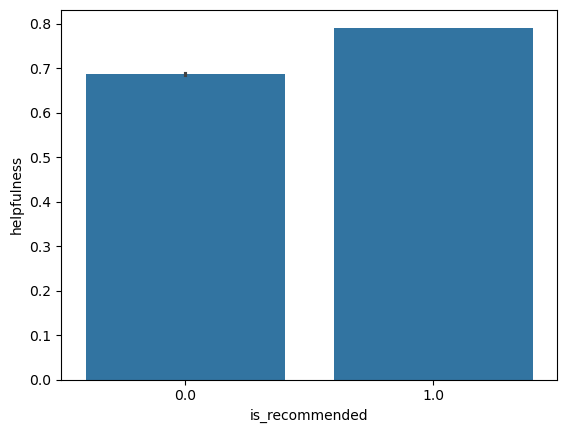

In [57]:
sns.barplot(df_review,y = df_review['helpfulness'],x=df_review['is_recommended'])

The helpfulness score for recommended products is slightly higher than for non-recommended products, however, the difference is relatively narrow.

Text(0.5, 0.98, 'Top Product')

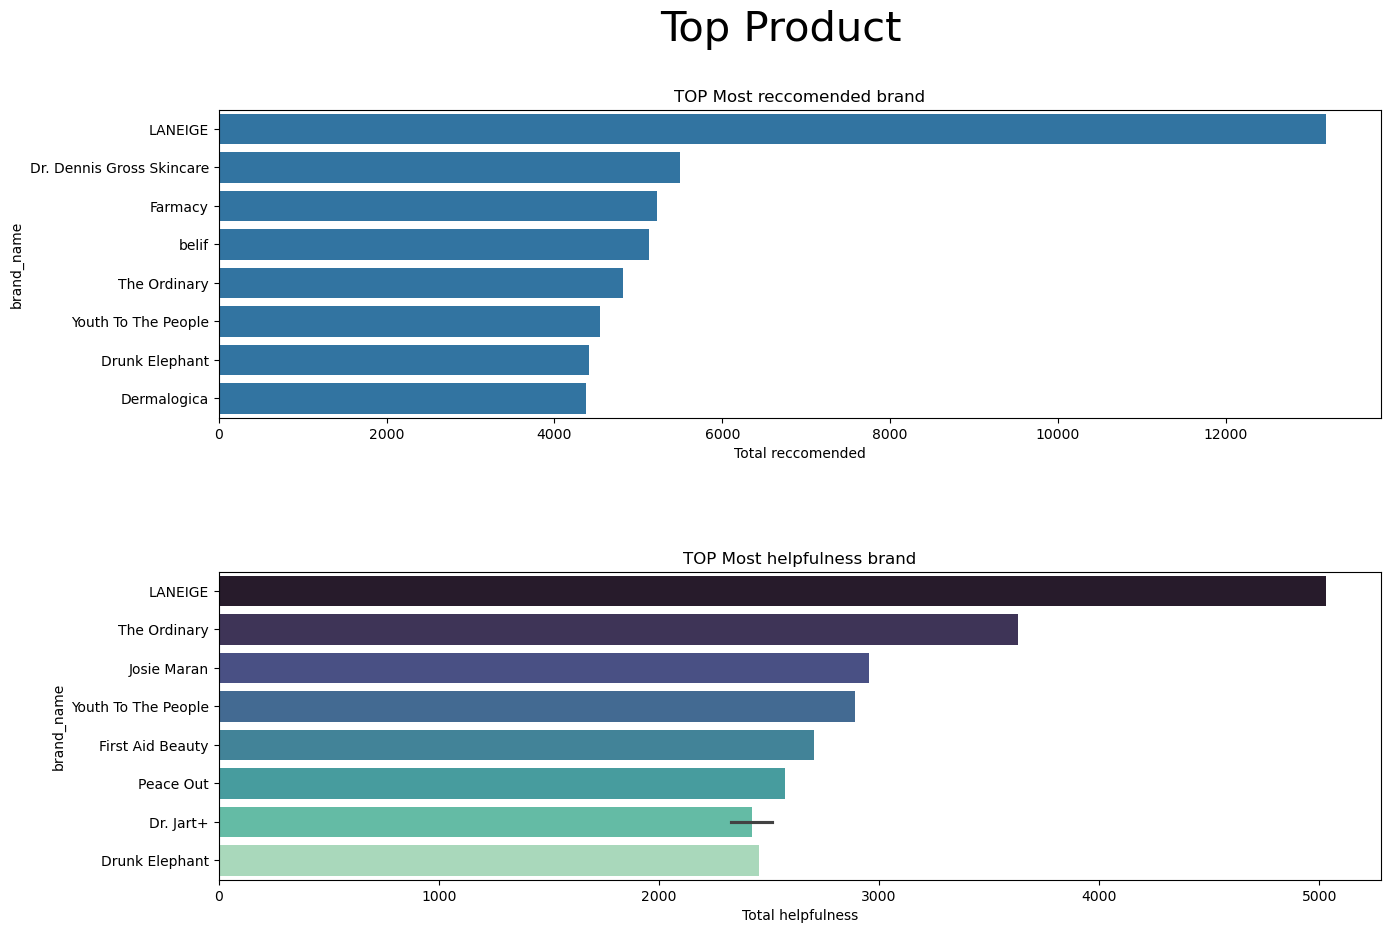

In [63]:
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)

most_reccomended = df_review.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['is_recommended'].reset_index()\
.sort_values('is_recommended',ascending=False).head(10)
sns.barplot(most_reccomended,x='is_recommended',y='brand_name',ax=ax1)
ax1.set_title("TOP Most reccomended brand")
ax1.set_xlabel("Total reccomended")

most_helpfulness = df_review.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['helpfulness'].reset_index()\
.sort_values('helpfulness',ascending=False).head(10)
sns.barplot(most_helpfulness,x='helpfulness',y='brand_name',ax=ax2,palette='mako')
ax2.set_title("TOP Most helpfulness brand")
ax2.set_xlabel("Total helpfulness")

plt.suptitle("Top Product",fontsize=30)

Text(0.5, 0.98, 'Top Product')

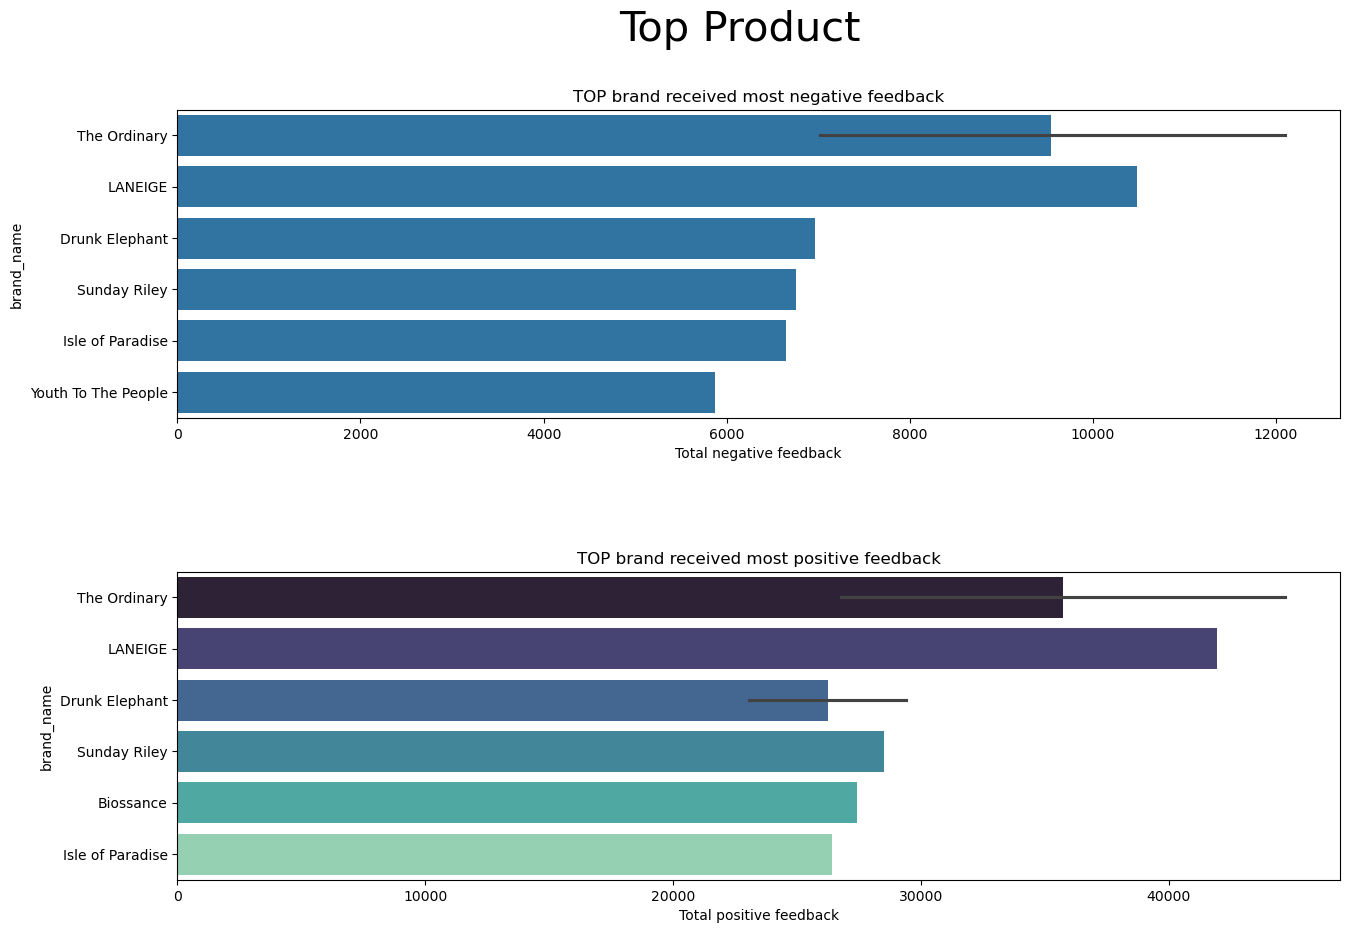

In [64]:
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize= (15,10))
fig.subplots_adjust(hspace=0.5)

most_reccomended = df_review.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['total_neg_feedback_count'].reset_index()\
.sort_values('total_neg_feedback_count',ascending=False).head(10)
sns.barplot(most_reccomended,x='total_neg_feedback_count',y='brand_name',ax=ax1)
ax1.set_title("TOP brand received most negative feedback")
ax1.set_xlabel("Total negative feedback")

most_helpfulness = df_review.groupby(['product_id','product_name','brand_name']).sum(numeric_only=True)['total_pos_feedback_count'].reset_index()\
.sort_values('total_pos_feedback_count',ascending=False).head(10)
sns.barplot(most_helpfulness,x='total_pos_feedback_count',y='brand_name',ax=ax2,palette='mako')
ax2.set_title("TOP brand received most positive feedback")
ax2.set_xlabel("Total positive feedback")

plt.suptitle("Top Product",fontsize=30)

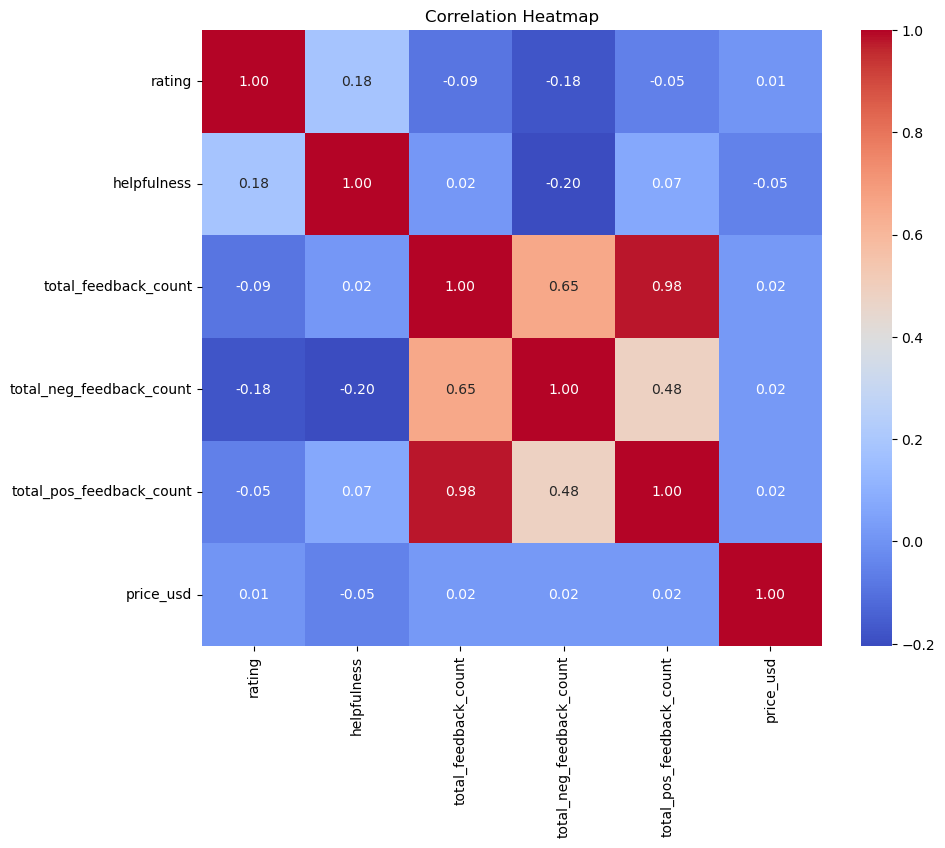

In [43]:
selected_columns = ['rating', 'helpfulness', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']
numeric_df = df_review[selected_columns]

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap")
plt.show()


rating and is_recommended the correlation coefficient is 0.85. 

There is a strong positive correlation of 0.98 between 'total_feedback_count' and 'total_pos_feedback_count'

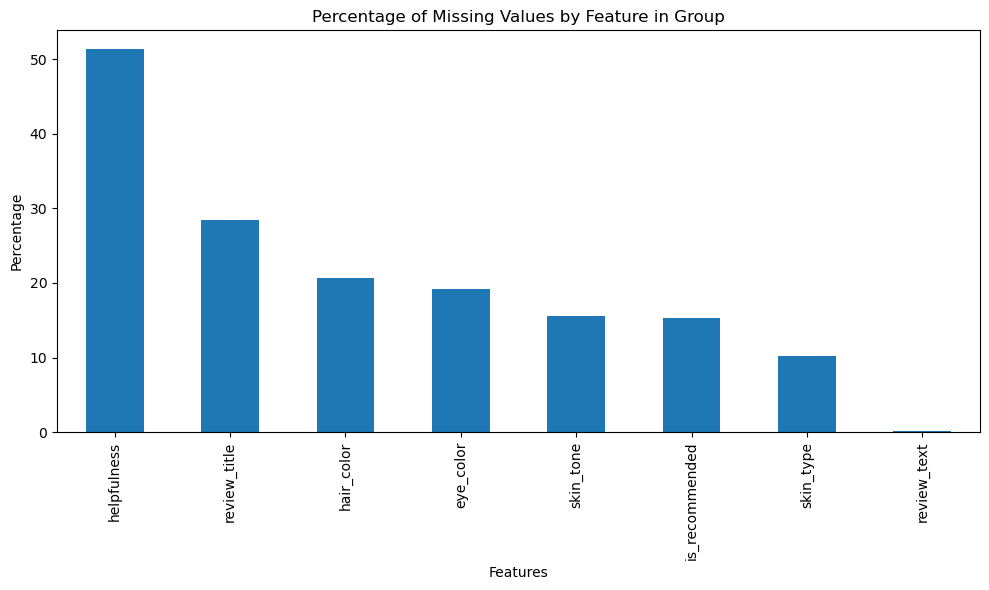

,Feature,Missing Count,Missing Percentage
helpfulness,helpfulness,561592,51.314543
review_title,review_title,310654,28.385497
hair_color,hair_color,226768,20.720552
eye_color,eye_color,209628,19.154413
skin_tone,skin_tone,170539,15.582720
is_recommended,is_recommended,167988,15.349626
skin_type,skin_type,111557,10.193337
review_text,review_text,1444,0.131943
brand_name,brand_name,0,0.000000
product_name,product_name,0,0.000000


In [44]:
quantify_missing_data_by_group(df_review, df_review.columns.tolist())

As you can see when the customers agree to recommend this product, they will tend to rate this product as helpful. Therefore we fill null of "helpfulness" column with 1 if the customer recommend this product and fill with 0 if they don't recommend it.

The columns 'hair_color', 'eye_color', 'skin_tone', 'skin_type' would be filled by "brand_id" since the customers tend to choose the brand based on their facial features to match with the function of each brand.

#### Outlier

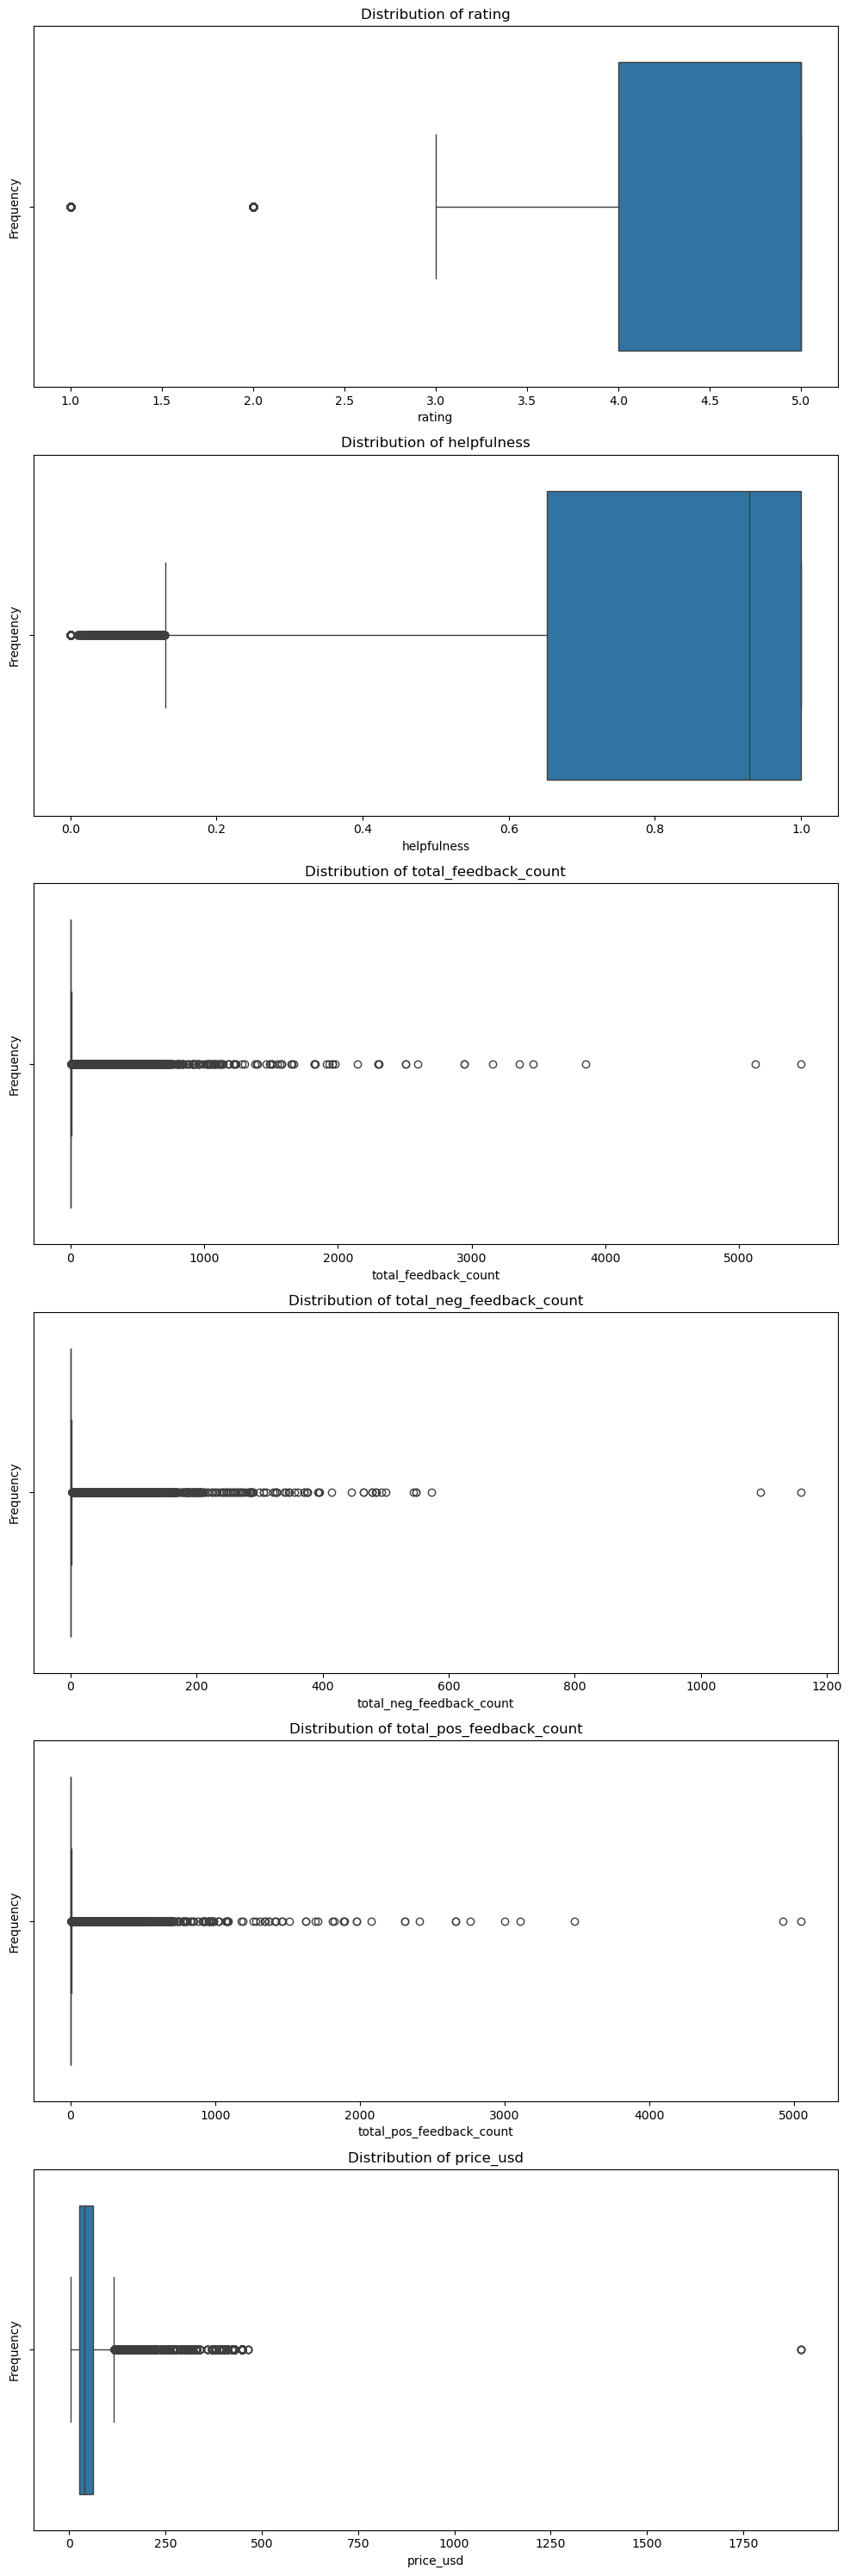

In [49]:
num_cols = len(numeric_df.columns)
fig, axes = plt.subplots(num_cols, 1, figsize=(10, num_cols * 5))

if num_cols == 1:
    axes = [axes]
    
for i, col in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [70]:
df_review[df_review['total_feedback_count']>5000]

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
11876,1925893875,5,1.0,0.924231,5464,414,5050,2018-12-31,There’s a lot of ridiculous things that make m...,Must buy.,fairLight,hazel,normal,red,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
15139,2515857948,1,0.0,0.961907,5119,195,4924,2018-01-05,"Didn’t really notice a difference, it only sta...",NaN,fair,hazel,combination,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [71]:
df_review[df_review['total_pos_feedback_count']>4000]

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
11876,1925893875,5,1.0,0.924231,5464,414,5050,2018-12-31,There’s a lot of ridiculous things that make m...,Must buy.,fairLight,hazel,normal,red,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
15139,2515857948,1,0.0,0.961907,5119,195,4924,2018-01-05,"Didn’t really notice a difference, it only sta...",NaN,fair,hazel,combination,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [68]:
df_review[df_review['total_neg_feedback_count']>1000]

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
1038521,7534108729,5,1.0,0.036123,1135,1094,41,2018-02-09,THIS MAKES MY SKIN FEEL LIKE AN ALLIGATOR ATE ...,NaN,light,hazel,normal,brown,P428255,Capture Youth Serum Collection,Dior,110.0
1092450,1723511130,1,0.0,0.051555,1222,1159,63,2020-05-17,ummm what? how big are these? pretty sure my D...,????,fairLight,green,combination,brown,P458958,Hydrating Boob and Bum Sheet Mask Duo,INC.redible,15.0


In [66]:
df_review[df_review['price_usd']>1000]

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
1094045,1885324769,1,0.0,1.000000,9,0,9,2023-02-25,Bought this online and the remote isn’t workin...,Didn’t work,tan,brown,dry,black,P502216,Shani Darden by Déesse PRO LED Light Mask,Shani Darden Skin Care,1900.0
1094046,1062321211,4,1.0,0.777778,27,6,21,2023-01-28,I have been using this mask for two weeks and ...,Too soon to see results - will update in a month,lightMedium,hazel,combination,brown,P502216,Shani Darden by Déesse PRO LED Light Mask,Shani Darden Skin Care,1900.0
1094047,1486490323,5,1.0,0.700000,10,3,7,2023-01-21,Great for discoloration/ age spots. Must simpl...,Definitely worth cost,NaN,hazel,oily,blonde,P502216,Shani Darden by Déesse PRO LED Light Mask,Shani Darden Skin Care,1900.0
1094048,1997394056,5,1.0,0.806452,31,6,25,2023-01-17,This is so worth the money. This is a professi...,Worth it!,NaN,NaN,NaN,NaN,P502216,Shani Darden by Déesse PRO LED Light Mask,Shani Darden Skin Care,1900.0


There are some outliers appeared in 3 feedback columns.
The 1900 value in 'price_used' column is an outlier, we can drop it

## Categorical columns

In [51]:
non_numeric_cols = df_review.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['author_id', 'submission_time', 'review_text', 'review_title',
       'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id',
       'product_name', 'brand_name'],
      dtype='object')


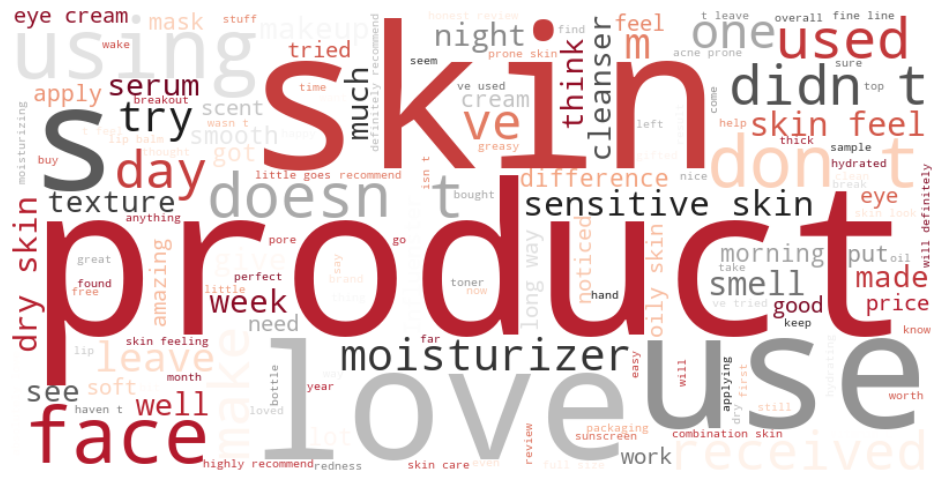

In [52]:
from wordcloud import WordCloud, STOPWORDS
# Extract the "review_text" column from the data frame
review_text = df_review['review_text'].astype(str)

# Define stopwords to be excluded from the word cloud
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "don t", "didn t", "don't", "doesn't", "didn't" ]) 

# Create a word cloud
word_cloud = WordCloud(stopwords=stopwords,
                       max_words=150,
                       background_color='white',
                       colormap='RdGy',  # Change the color scheme
                       width=800,
                       height=400).generate(' '.join(review_text))

# Display the generated word cloud
plt.figure(figsize=(12, 6))  # Modify the figure size
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

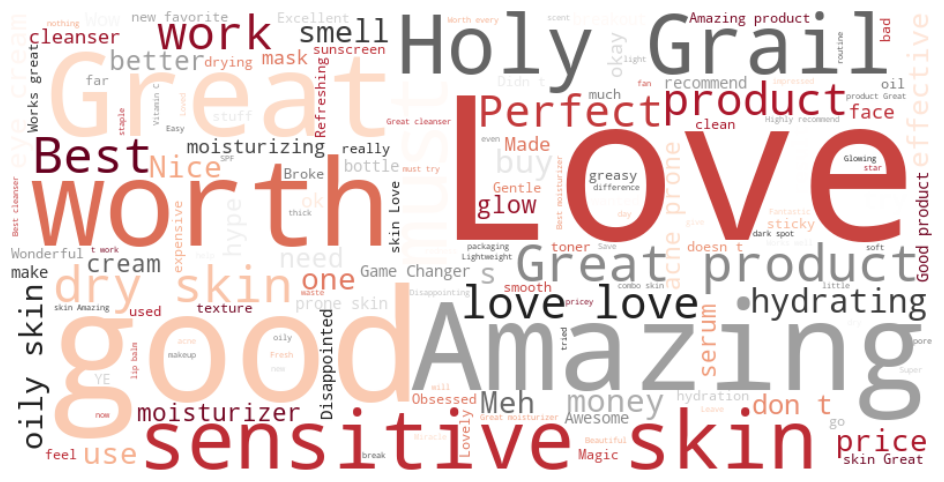

In [59]:
df_re = df_review.dropna()
review_text = df_re['review_title'].astype(str)

# Define stopwords to be excluded from the word cloud
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "don t", "didn t", "don't", "doesn't", "didn't" ]) 

# Create a word cloud
word_cloud = WordCloud(stopwords=stopwords,
                       max_words=150,
                       background_color='white',
                       colormap='RdGy',  # Change the color scheme
                       width=800,
                       height=400).generate(' '.join(review_text))

# Display the generated word cloud
plt.figure(figsize=(12, 6))  # Modify the figure size
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We can use Label Encoding for the categorical columns that related to the feature of the customers such as 'skin_tone', 'eye_color', 'skin_type', 
             'hair_color'